Clustering analysis

In [217]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [218]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Combined_data.csv'
df=pd.read_csv(url,index_col='FIPS',encoding="ISO-8859-1")

In [219]:
#standardize data: (x-mean(x))/std
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

numeric_columns=[c for c in df.columns if is_numeric_dtype(df[c])]
df=df[numeric_columns].dropna()
df=df[df.columns.difference(['Adult_ob','Adult_db',
                             'Low_Access_low_income','Low_Access_Seniors',
                             'Low_Access_Child', 'Very_low_insecurity'])]

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 1001 to 56045
Data columns (total 25 columns):
<18                                  3098 non-null float64
>=65                                 3098 non-null float64
American Indian or Alaska Native     3098 non-null float64
Asian                                3098 non-null float64
Assistance                           3098 non-null float64
Black                                3098 non-null float64
Convenience                          3098 non-null float64
Farm                                 3098 non-null float64
Fast_food                            3098 non-null float64
Full_service                         3098 non-null float64
Grocery                              3098 non-null float64
Hawaiian or Pacific Islander         3098 non-null float64
Hispanic                             3098 non-null float64
Low_Access_Overall                   3098 non-null float64
Low_insecurity                       3098 non-null float64
Pove

In [260]:
normed_data=preprocessing.scale(df)
normed_df=pd.DataFrame(normed_data, index=df.index, columns=df.columns)

In [232]:
normed_df['level_diabetes']=pd.qcut(normed_df['prevalence of diabetes'], [0, .25, .5, .75, 1.], labels=False)
normed_df['level_obesity']=pd.qcut(normed_df['prevalence of obesity'], [0, .25, .5, .75, 1.], labels=False)
normed_df['level_phy']=pd.qcut(normed_df['prevalence of physical inactivity'], [0, .25, .5, .75, 1.], labels=False)
lut = dict(zip([0,1,2,3], "bgyr"))

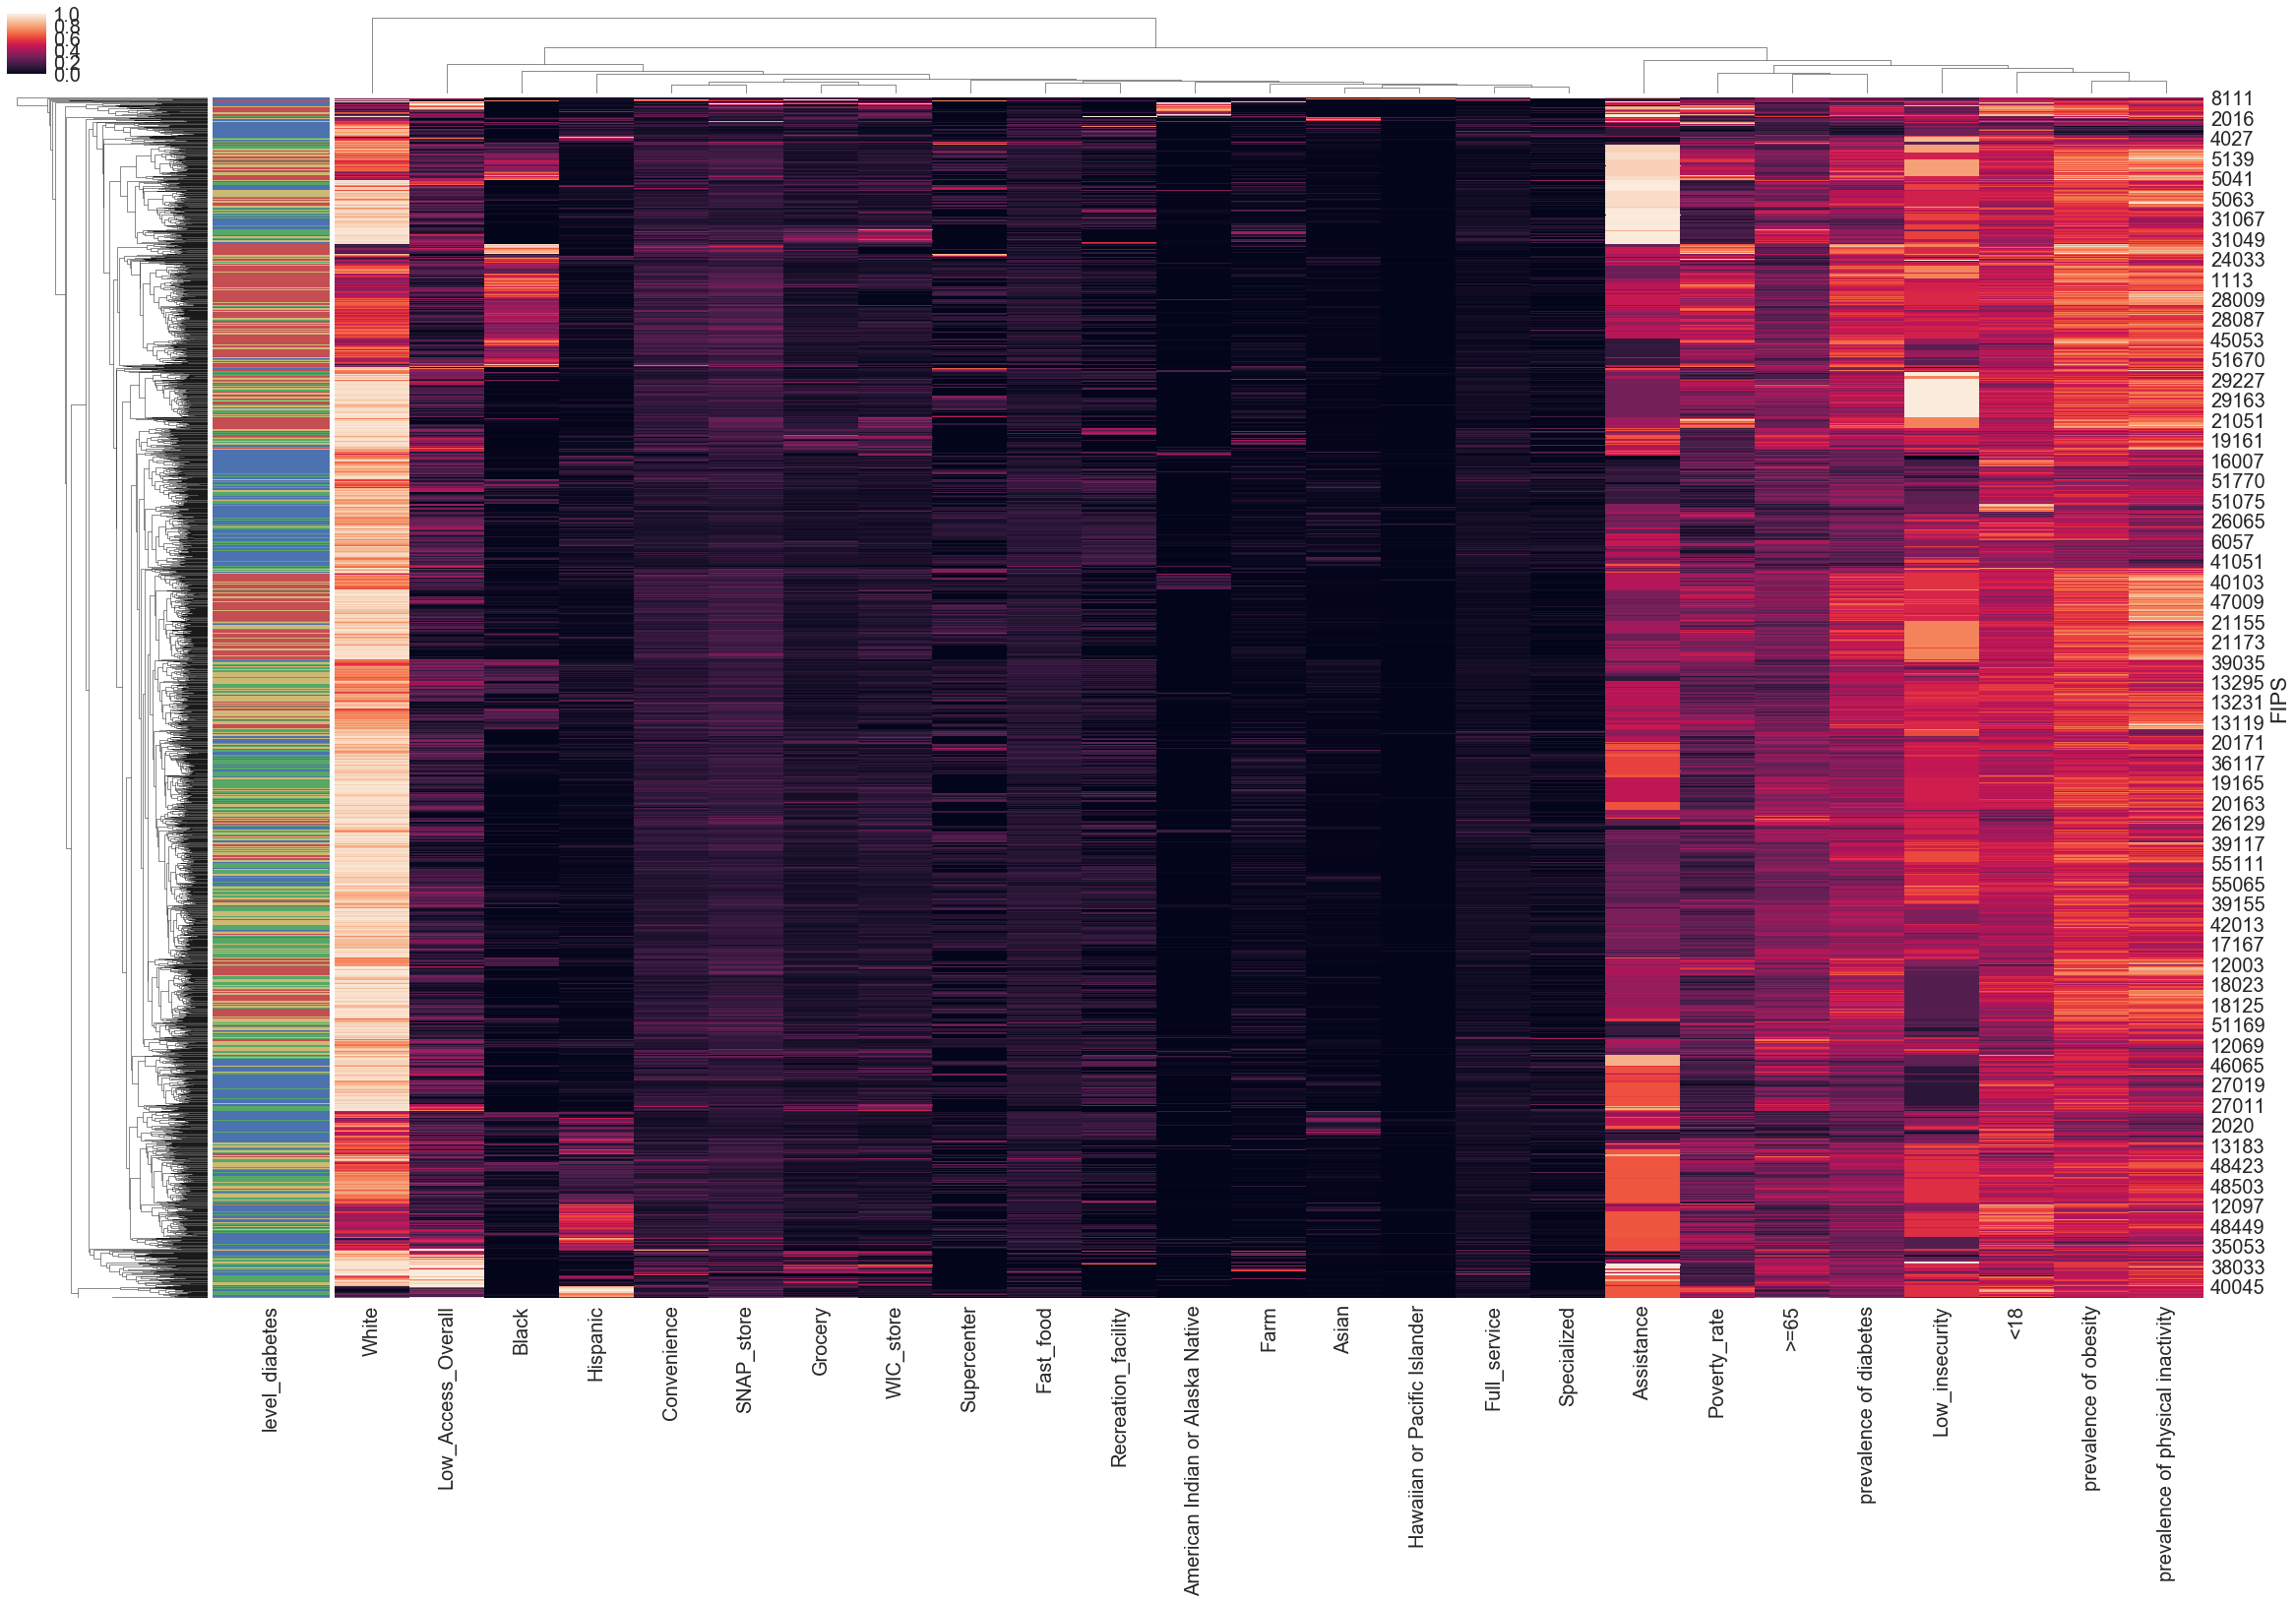

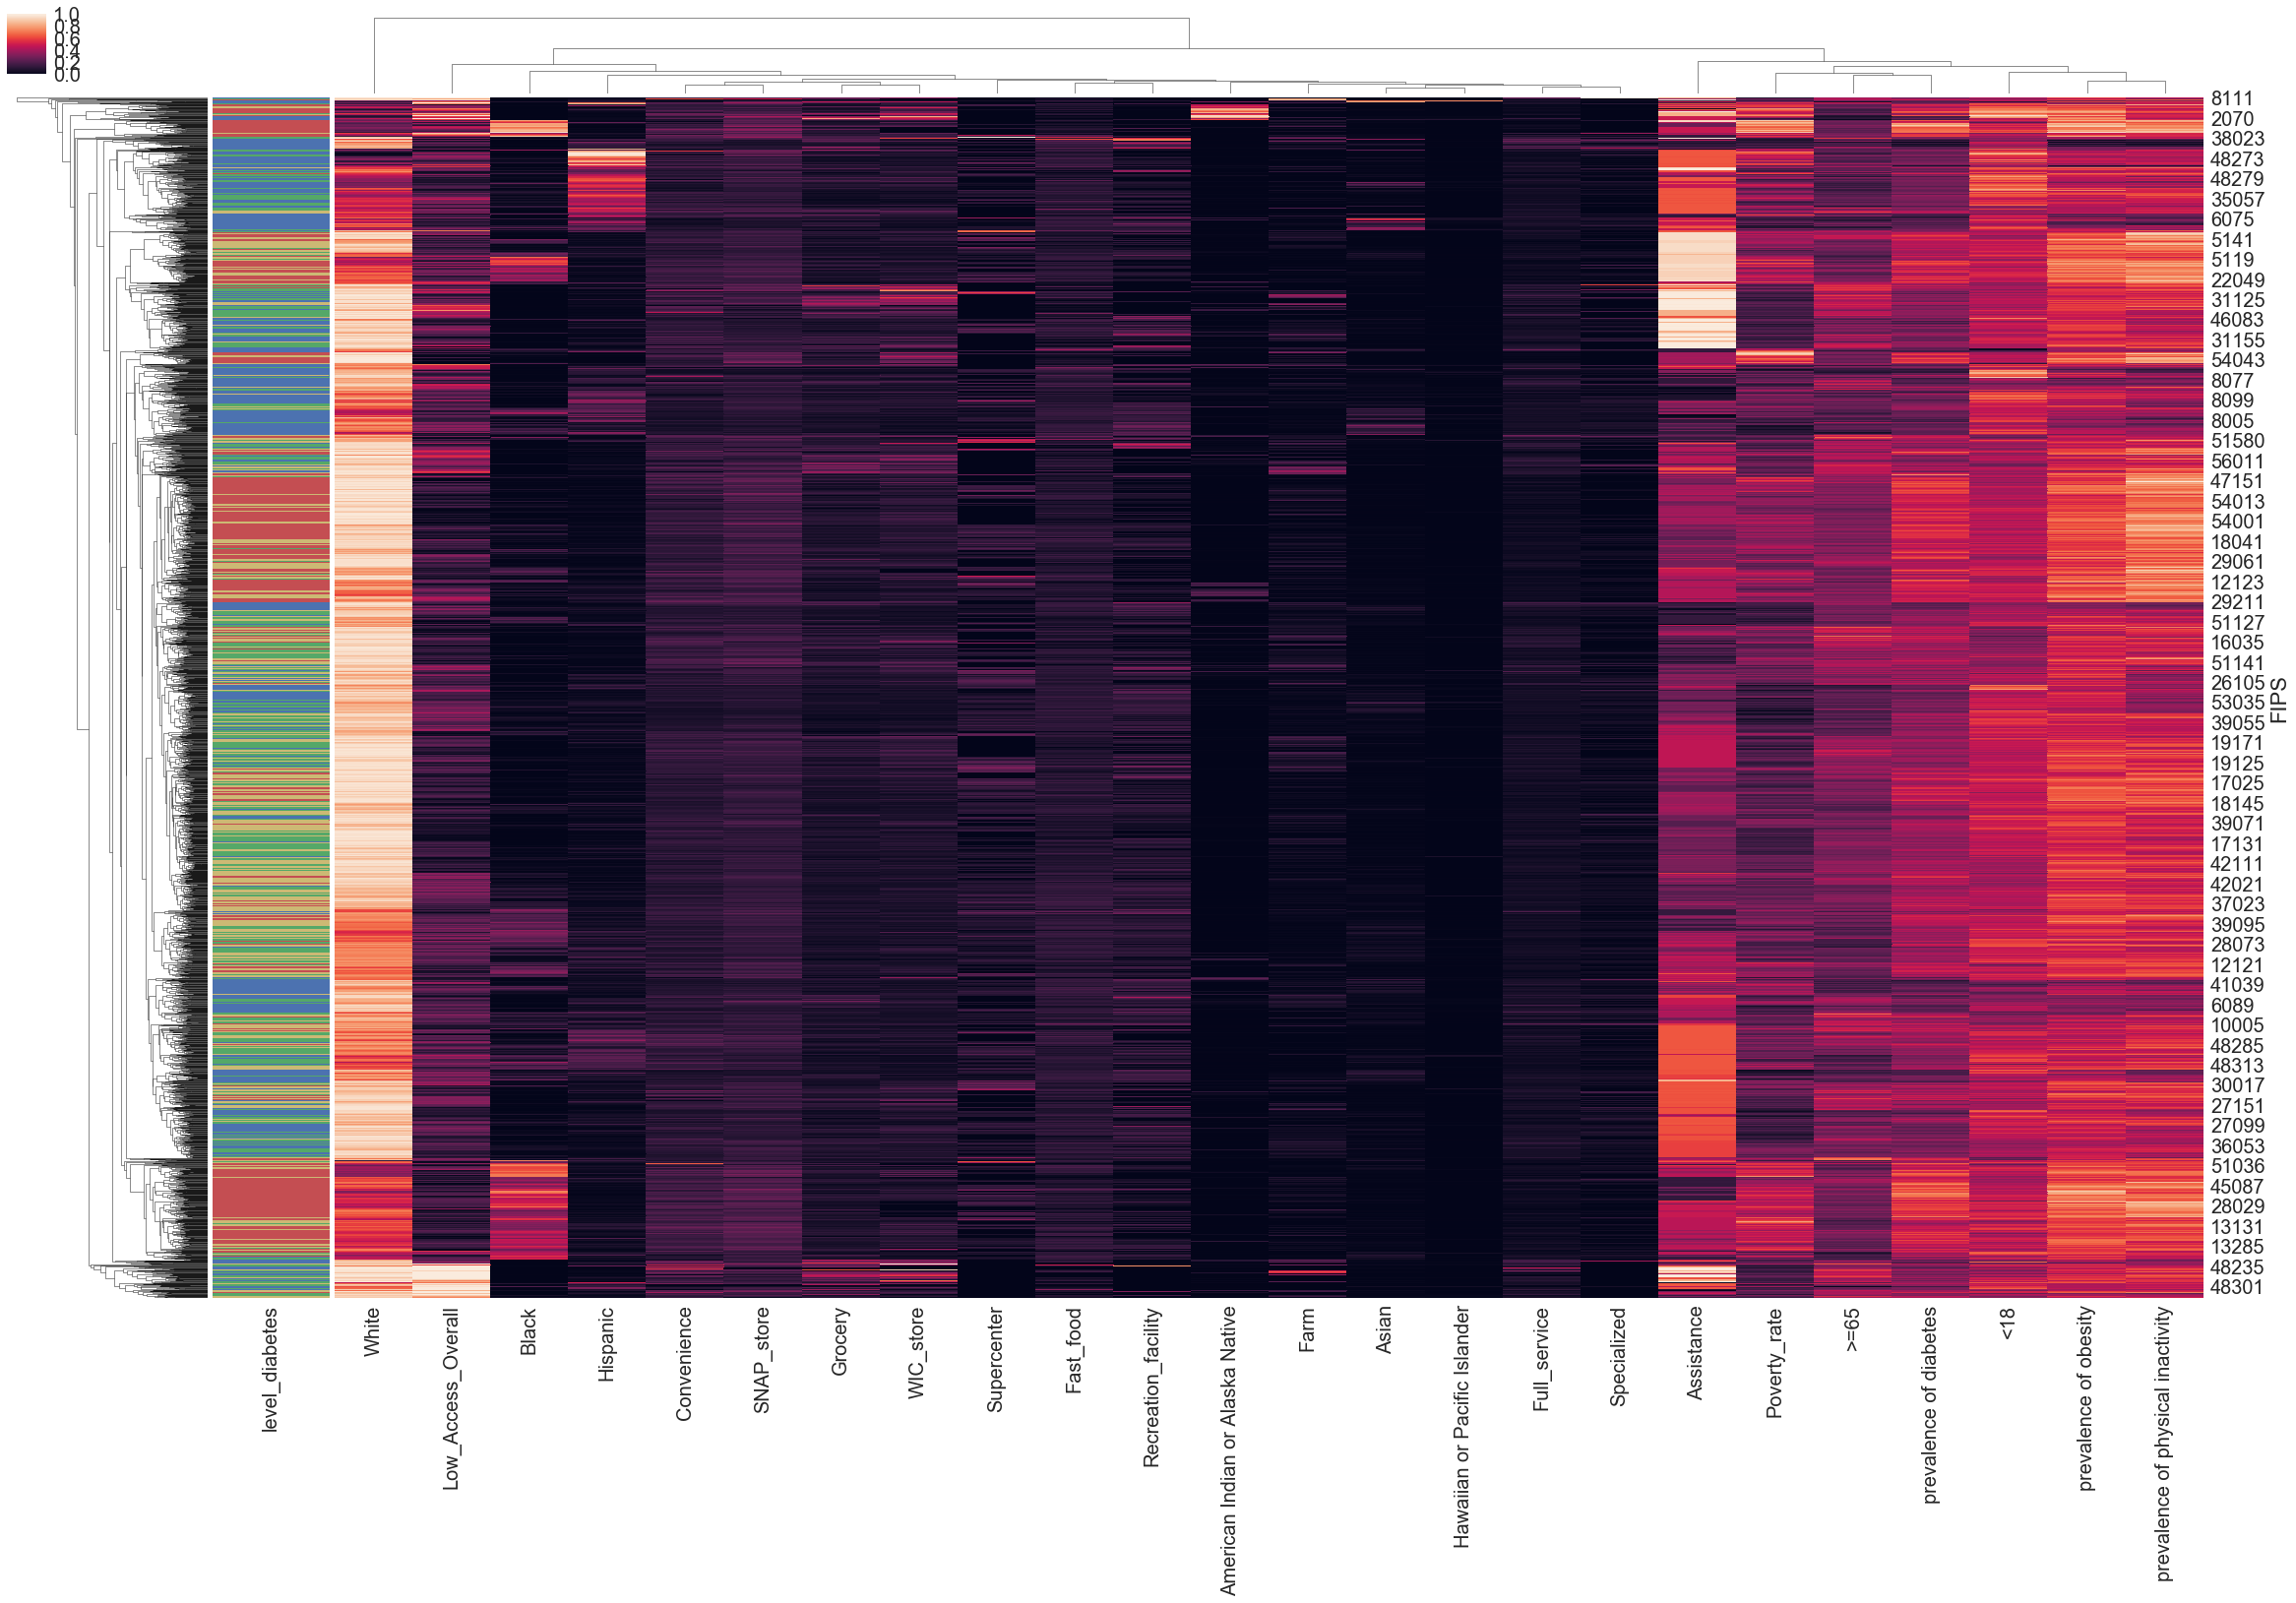

In [291]:
sns.set(font_scale=2)
row_colors = normed_df['level_diabetes'].map(lut)
g = sns.clustermap(normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)
plt.figure()                                                        
g = sns.clustermap(normed_df[normed_df.columns.difference(['Low_insecurity', 'level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1,annot_kws={"size": 16})                                                           
                                               
plt.show()

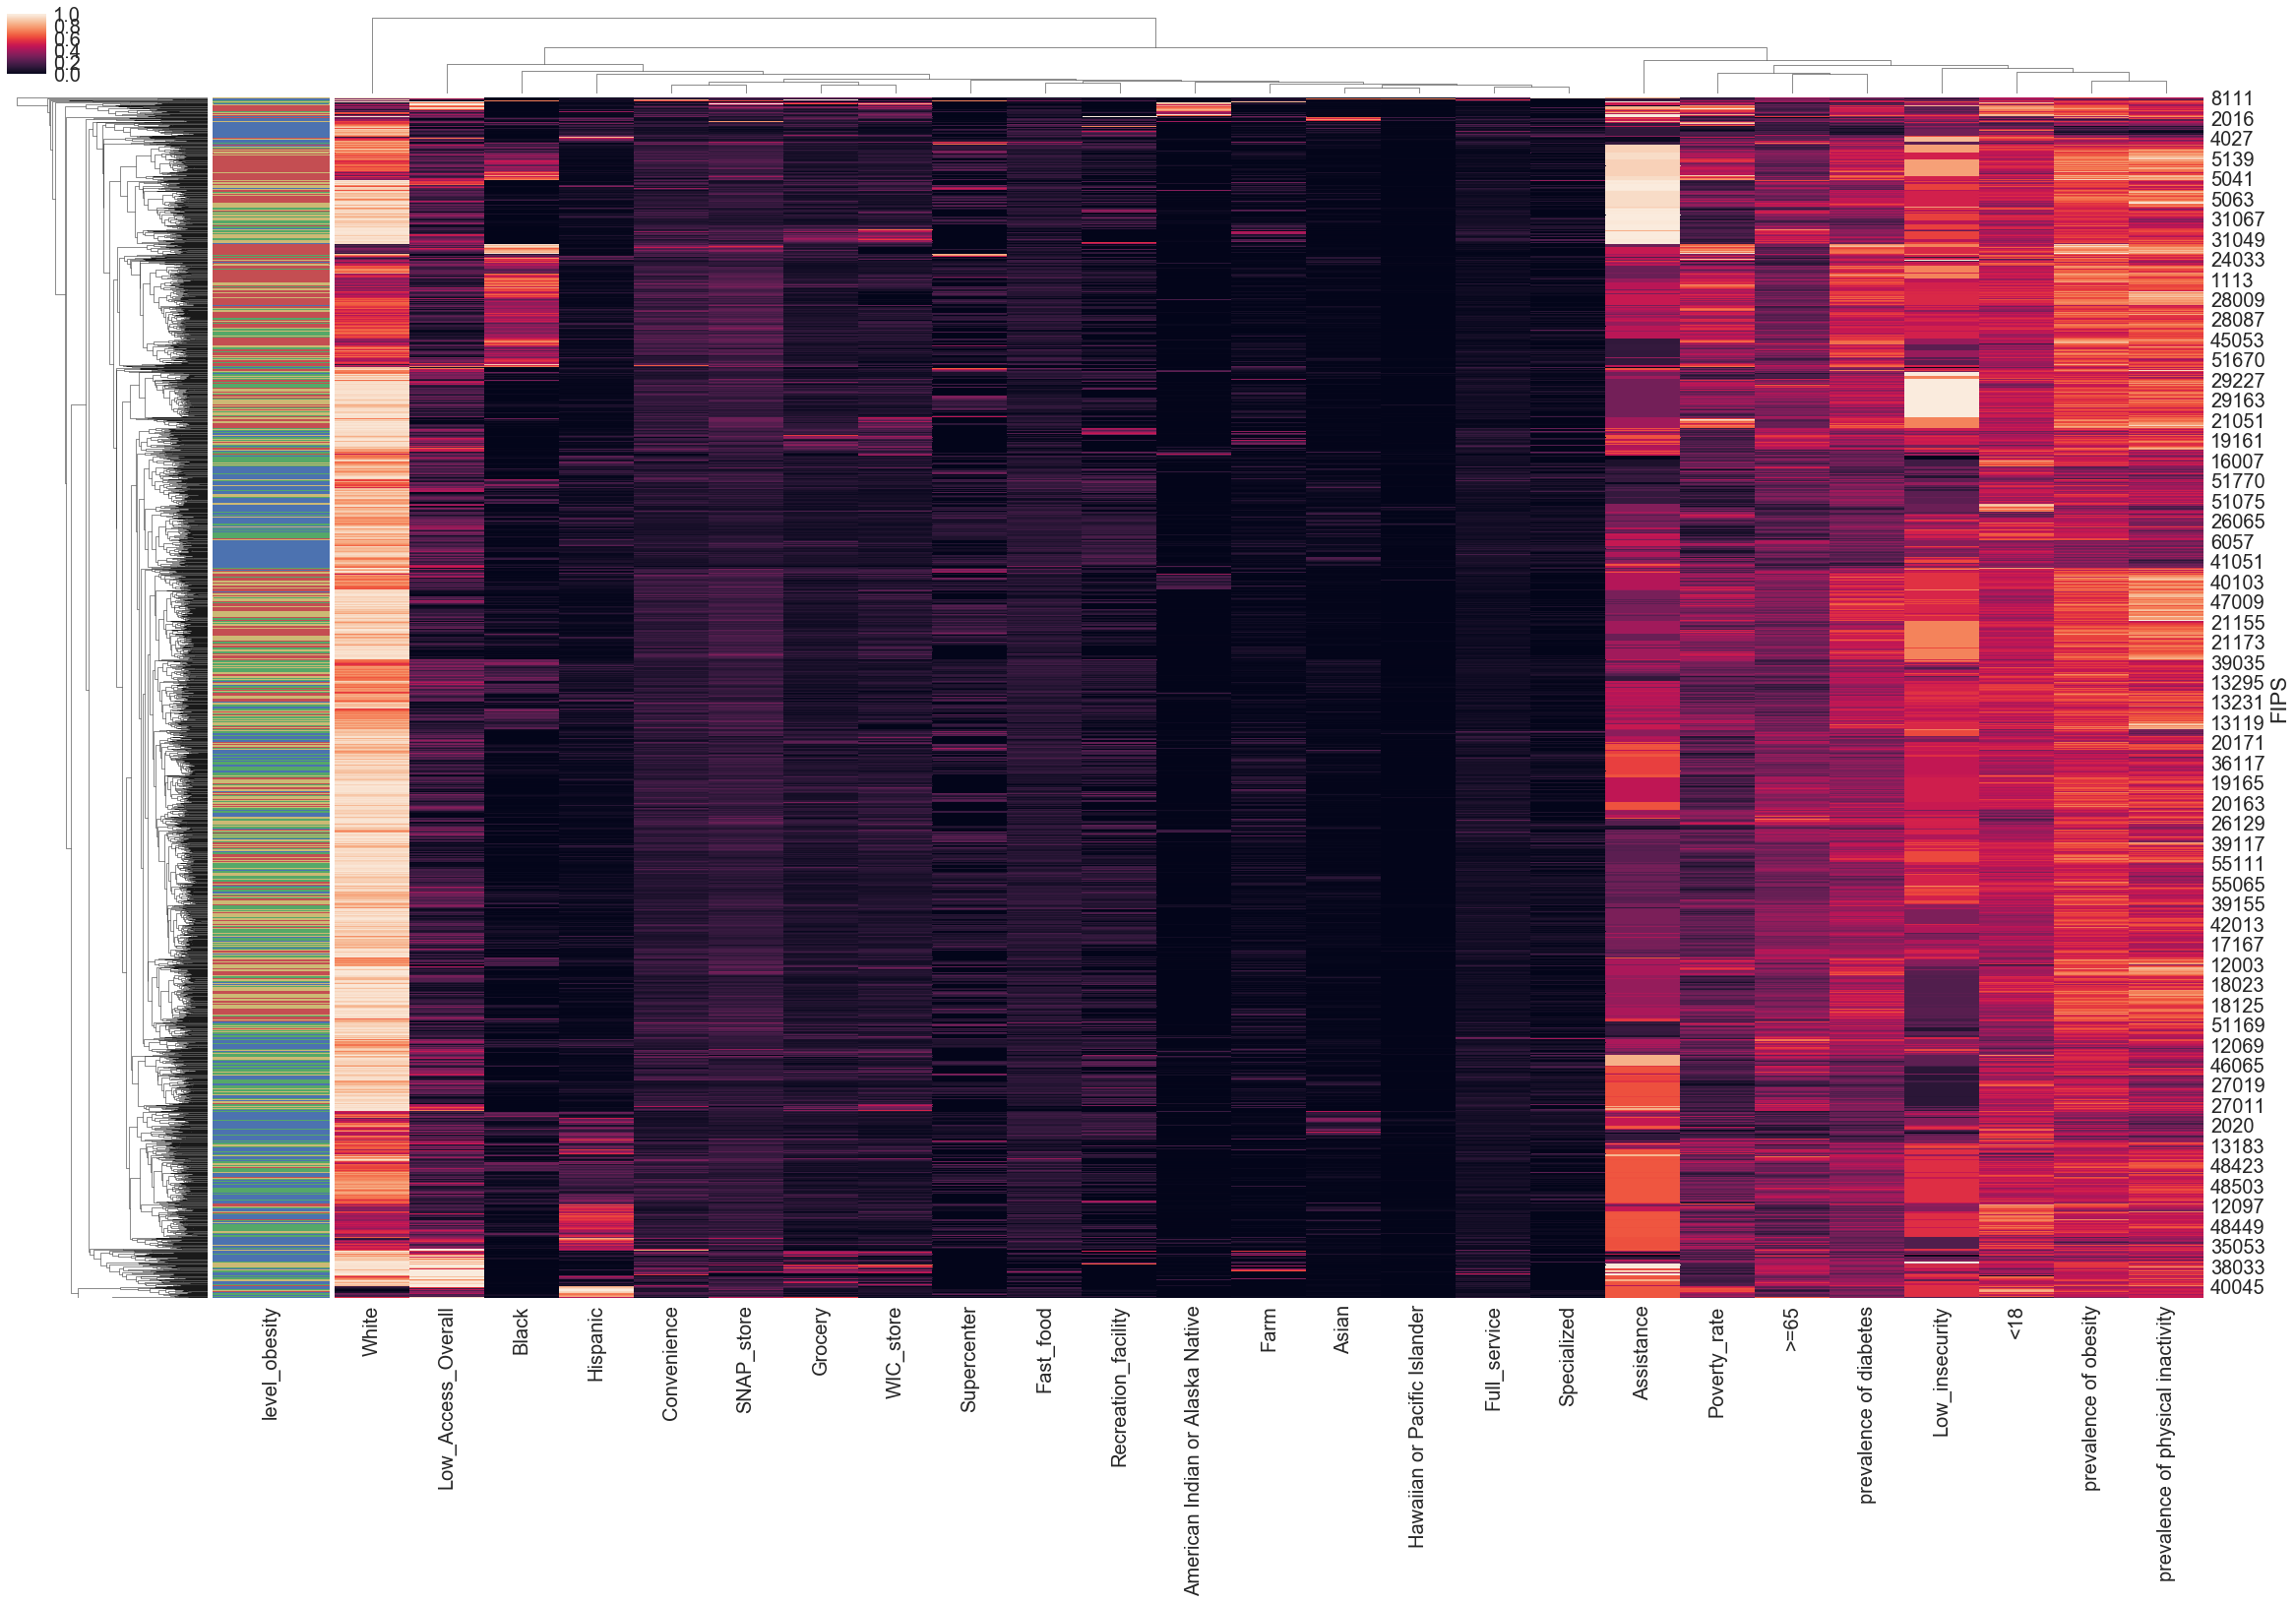

In [242]:
sns.set(font_scale=2)

grouptag='level_obesity'

row_colors = normed_df[grouptag].map(lut)
g = sns.clustermap(normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)
plt.show()

In [292]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

#'Low_insecurity'
X=normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])]
distance_way= ['ward', 'single', 'average', 'weighted', 'centroid', 'median']

for m in distance_way:
    Z = linkage(X, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print (m, c)

ward 0.245412121538
single 0.839603047044
average 0.881362305876
weighted 0.69019780408
centroid 0.884548813426
median 0.712313259432


average distance is the best meausre to preserve the real distance

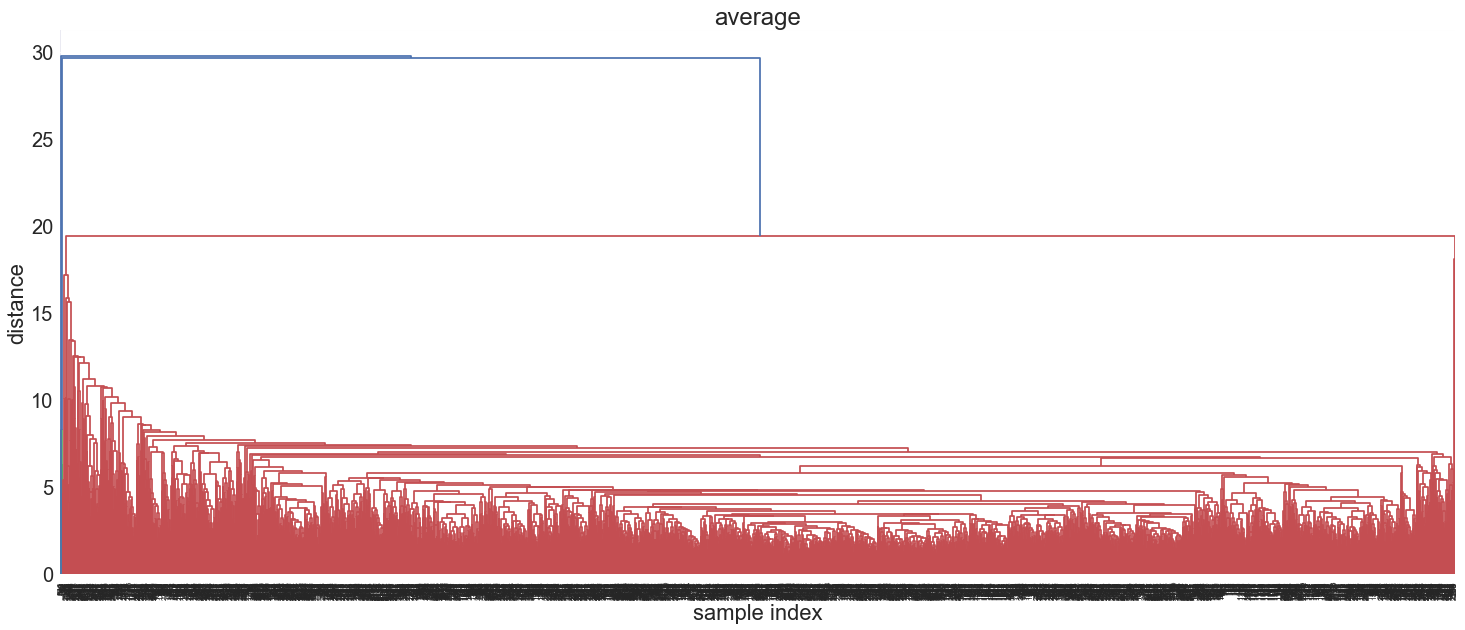

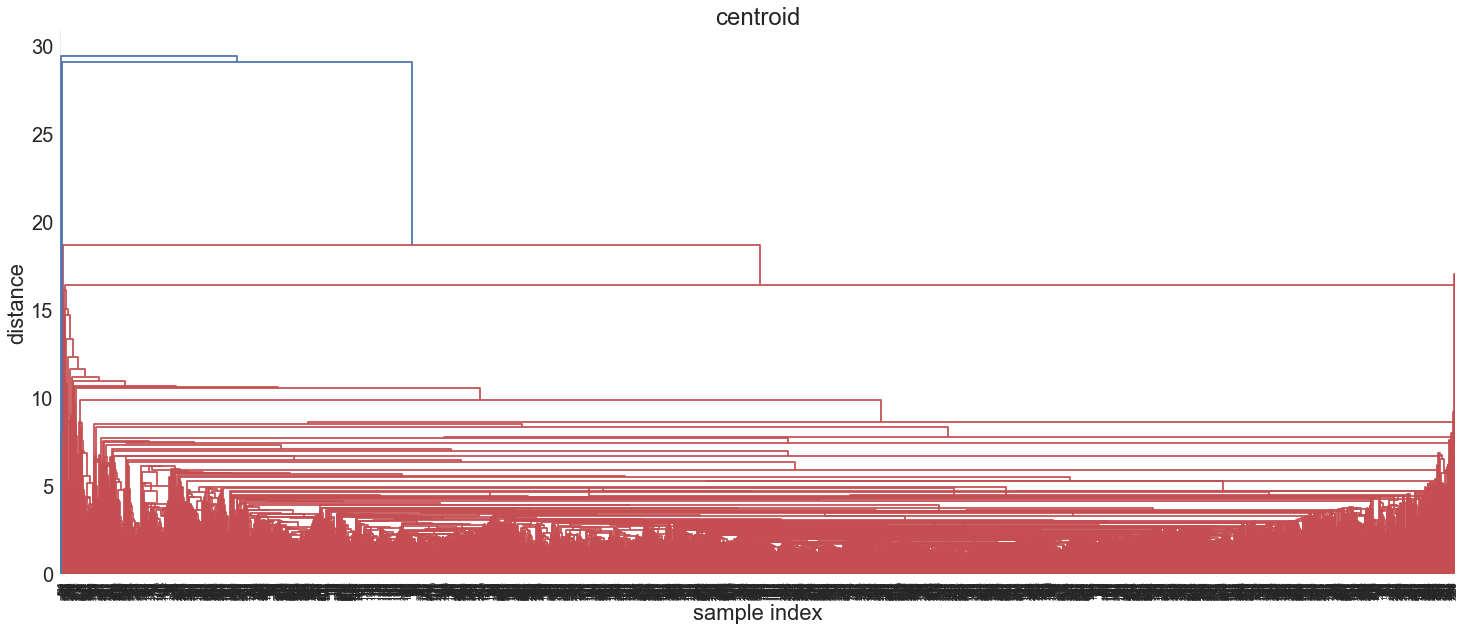

In [302]:
# calculate full dendrogram
Z = linkage(X, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('average')
plt.show()

Z = linkage(X, 'centroid')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('centroid')
plt.show()

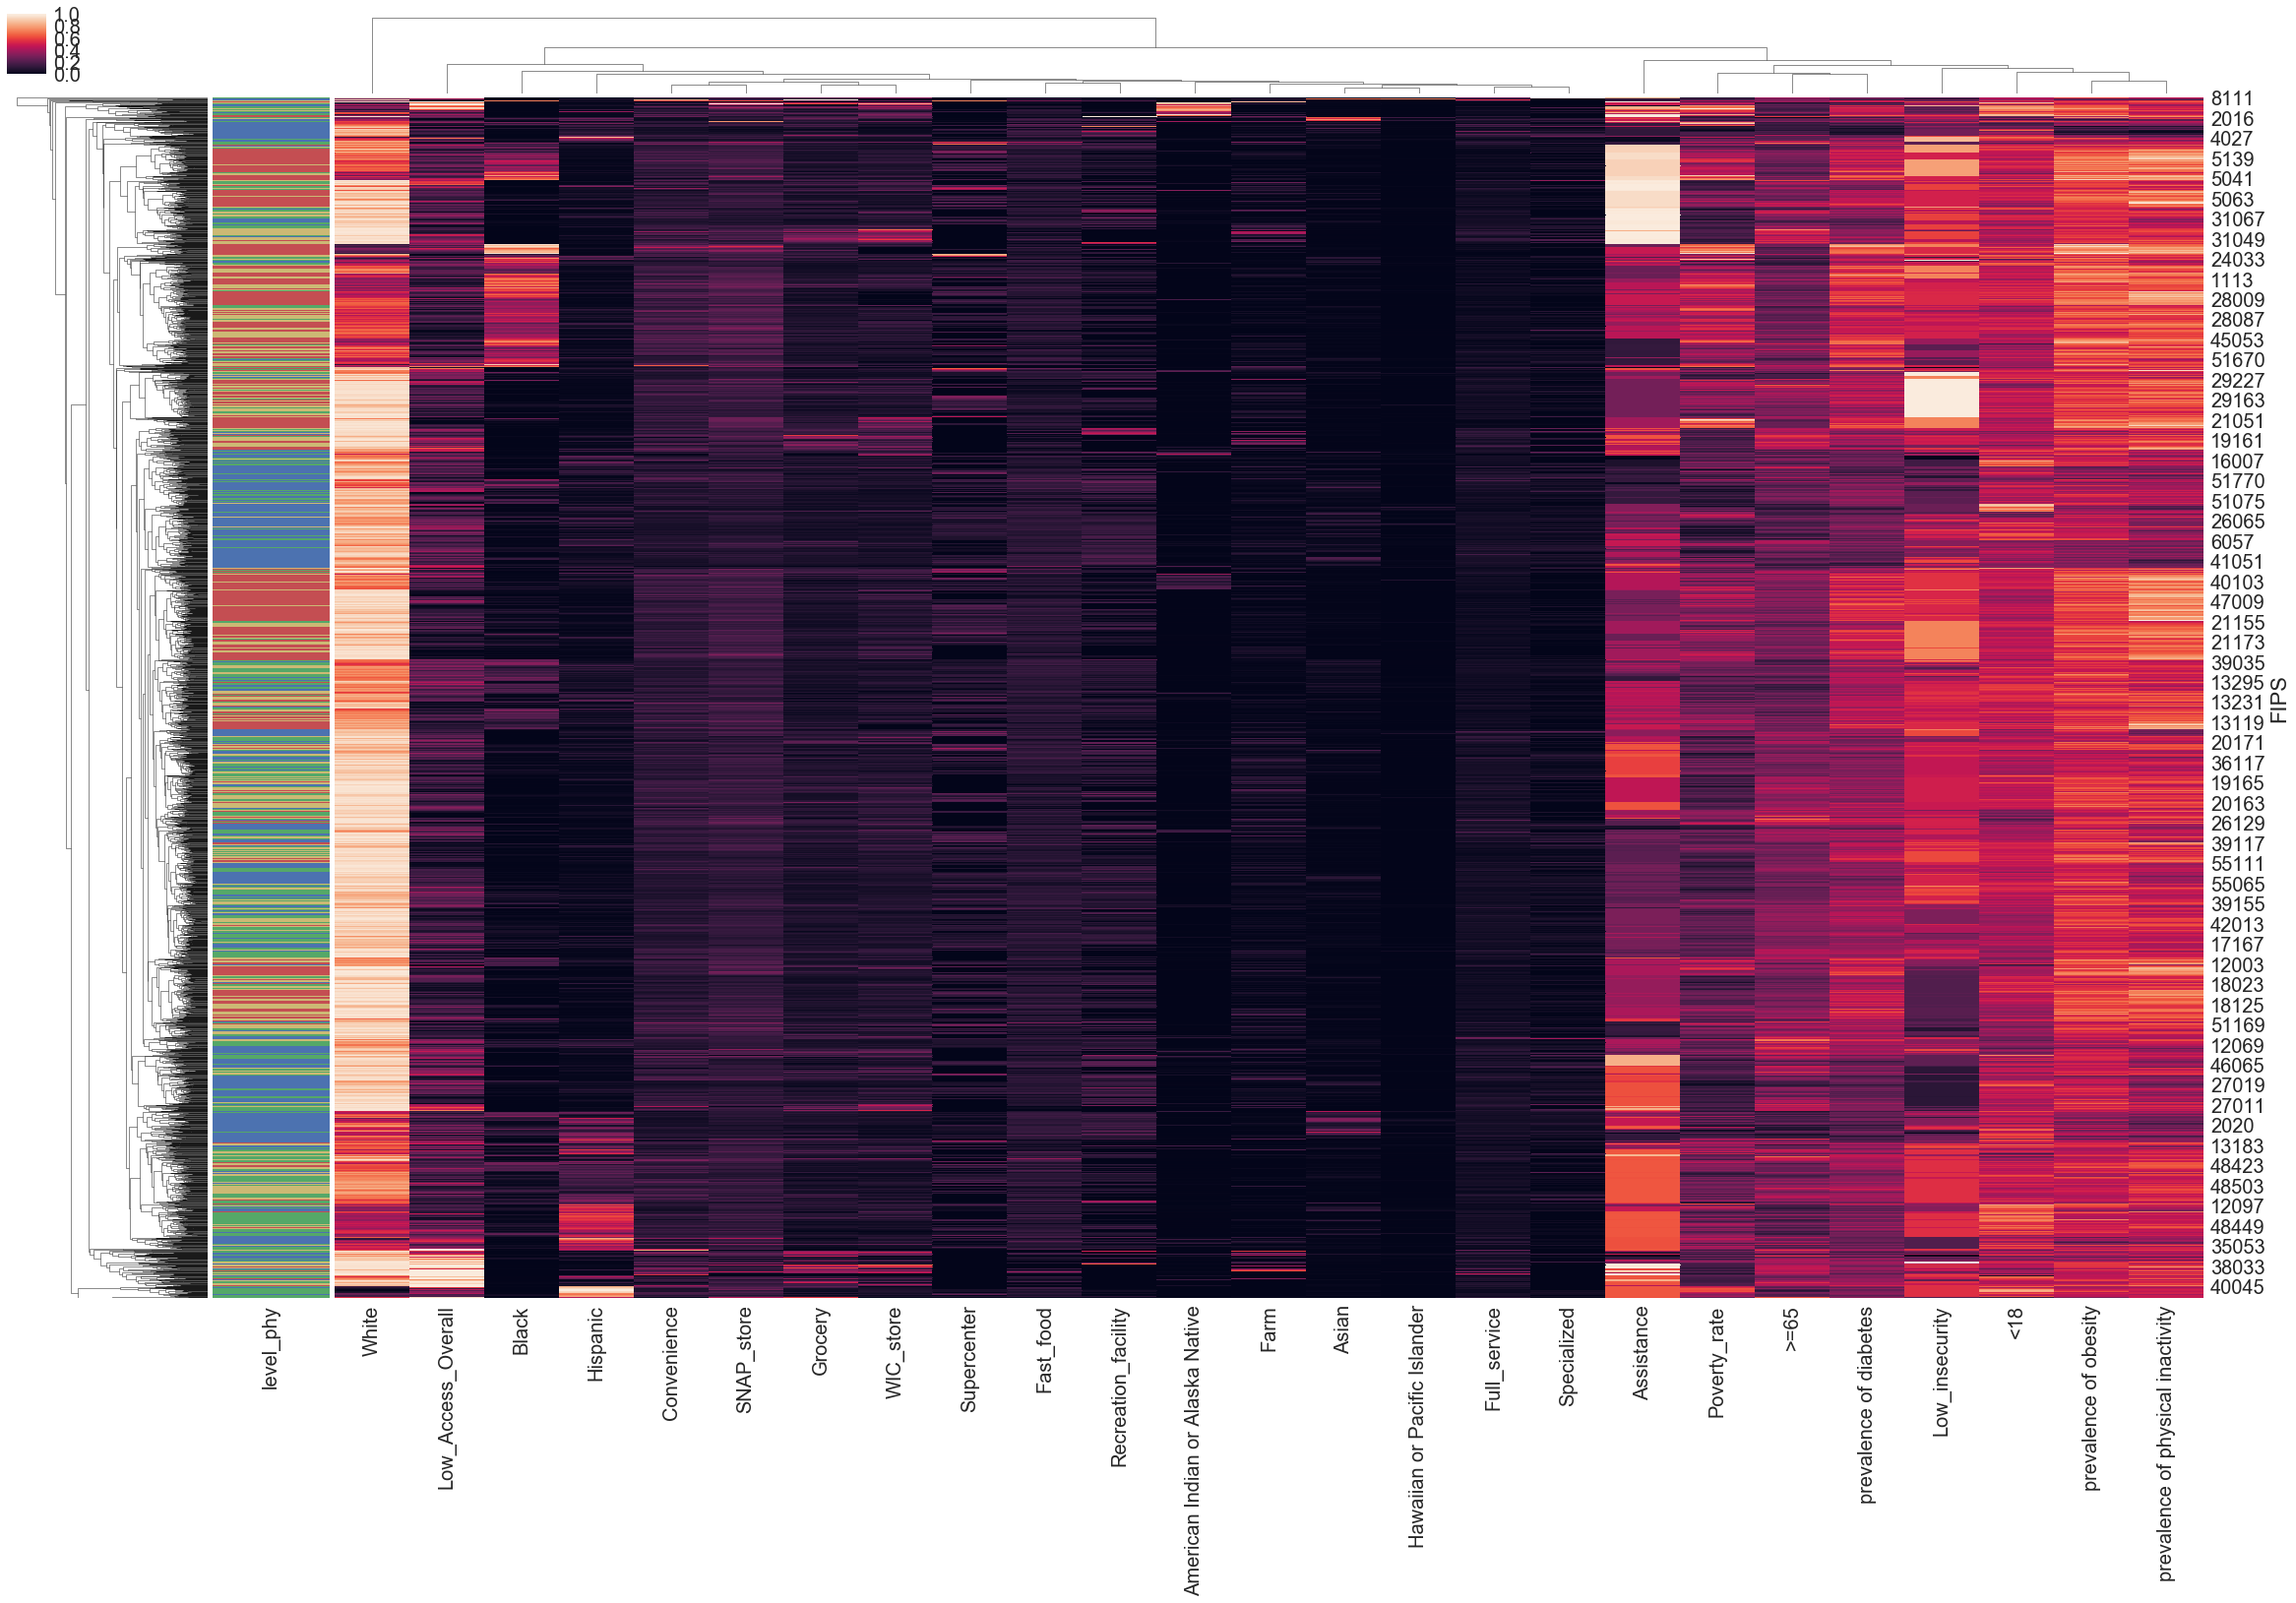

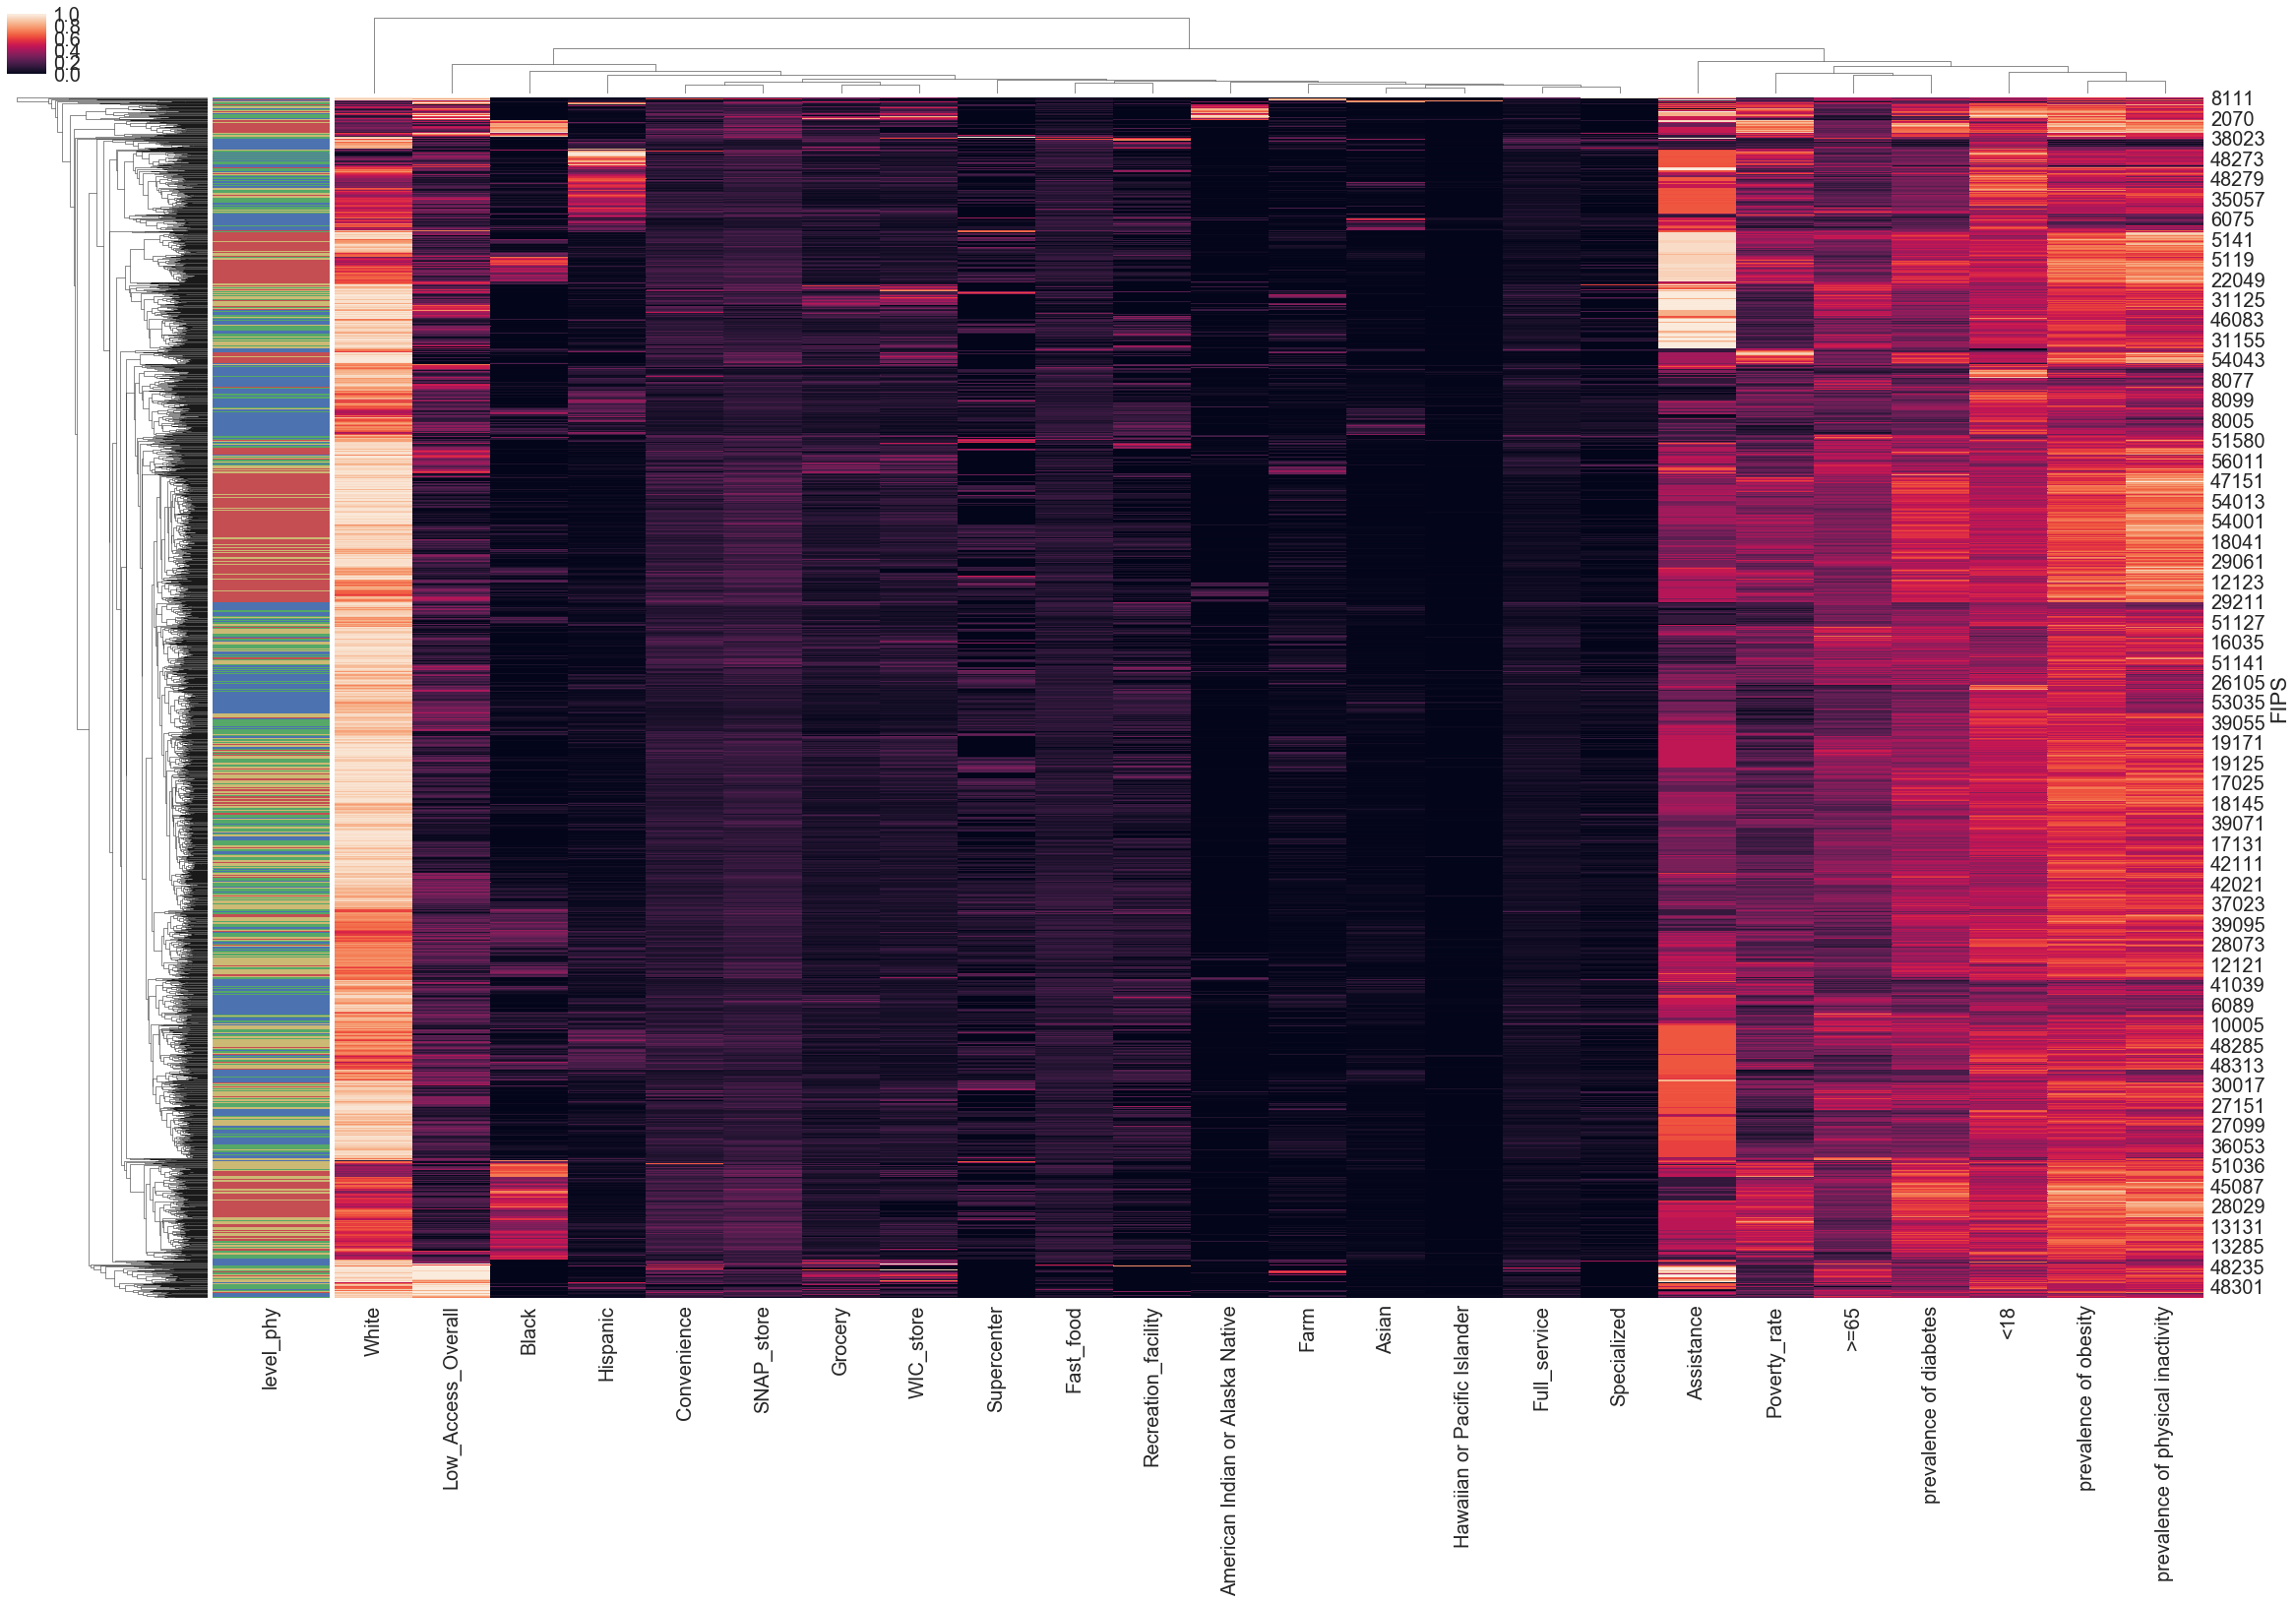

In [283]:
sns.set(font_scale=2)

grouptag='level_phy'

row_colors = normed_df[grouptag].map(lut)


g = sns.clustermap(normed_df[normed_df.columns.difference(['level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)

plt.figure()
g = sns.clustermap(normed_df[normed_df.columns.difference(['Low_insecurity','level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)
plt.show()

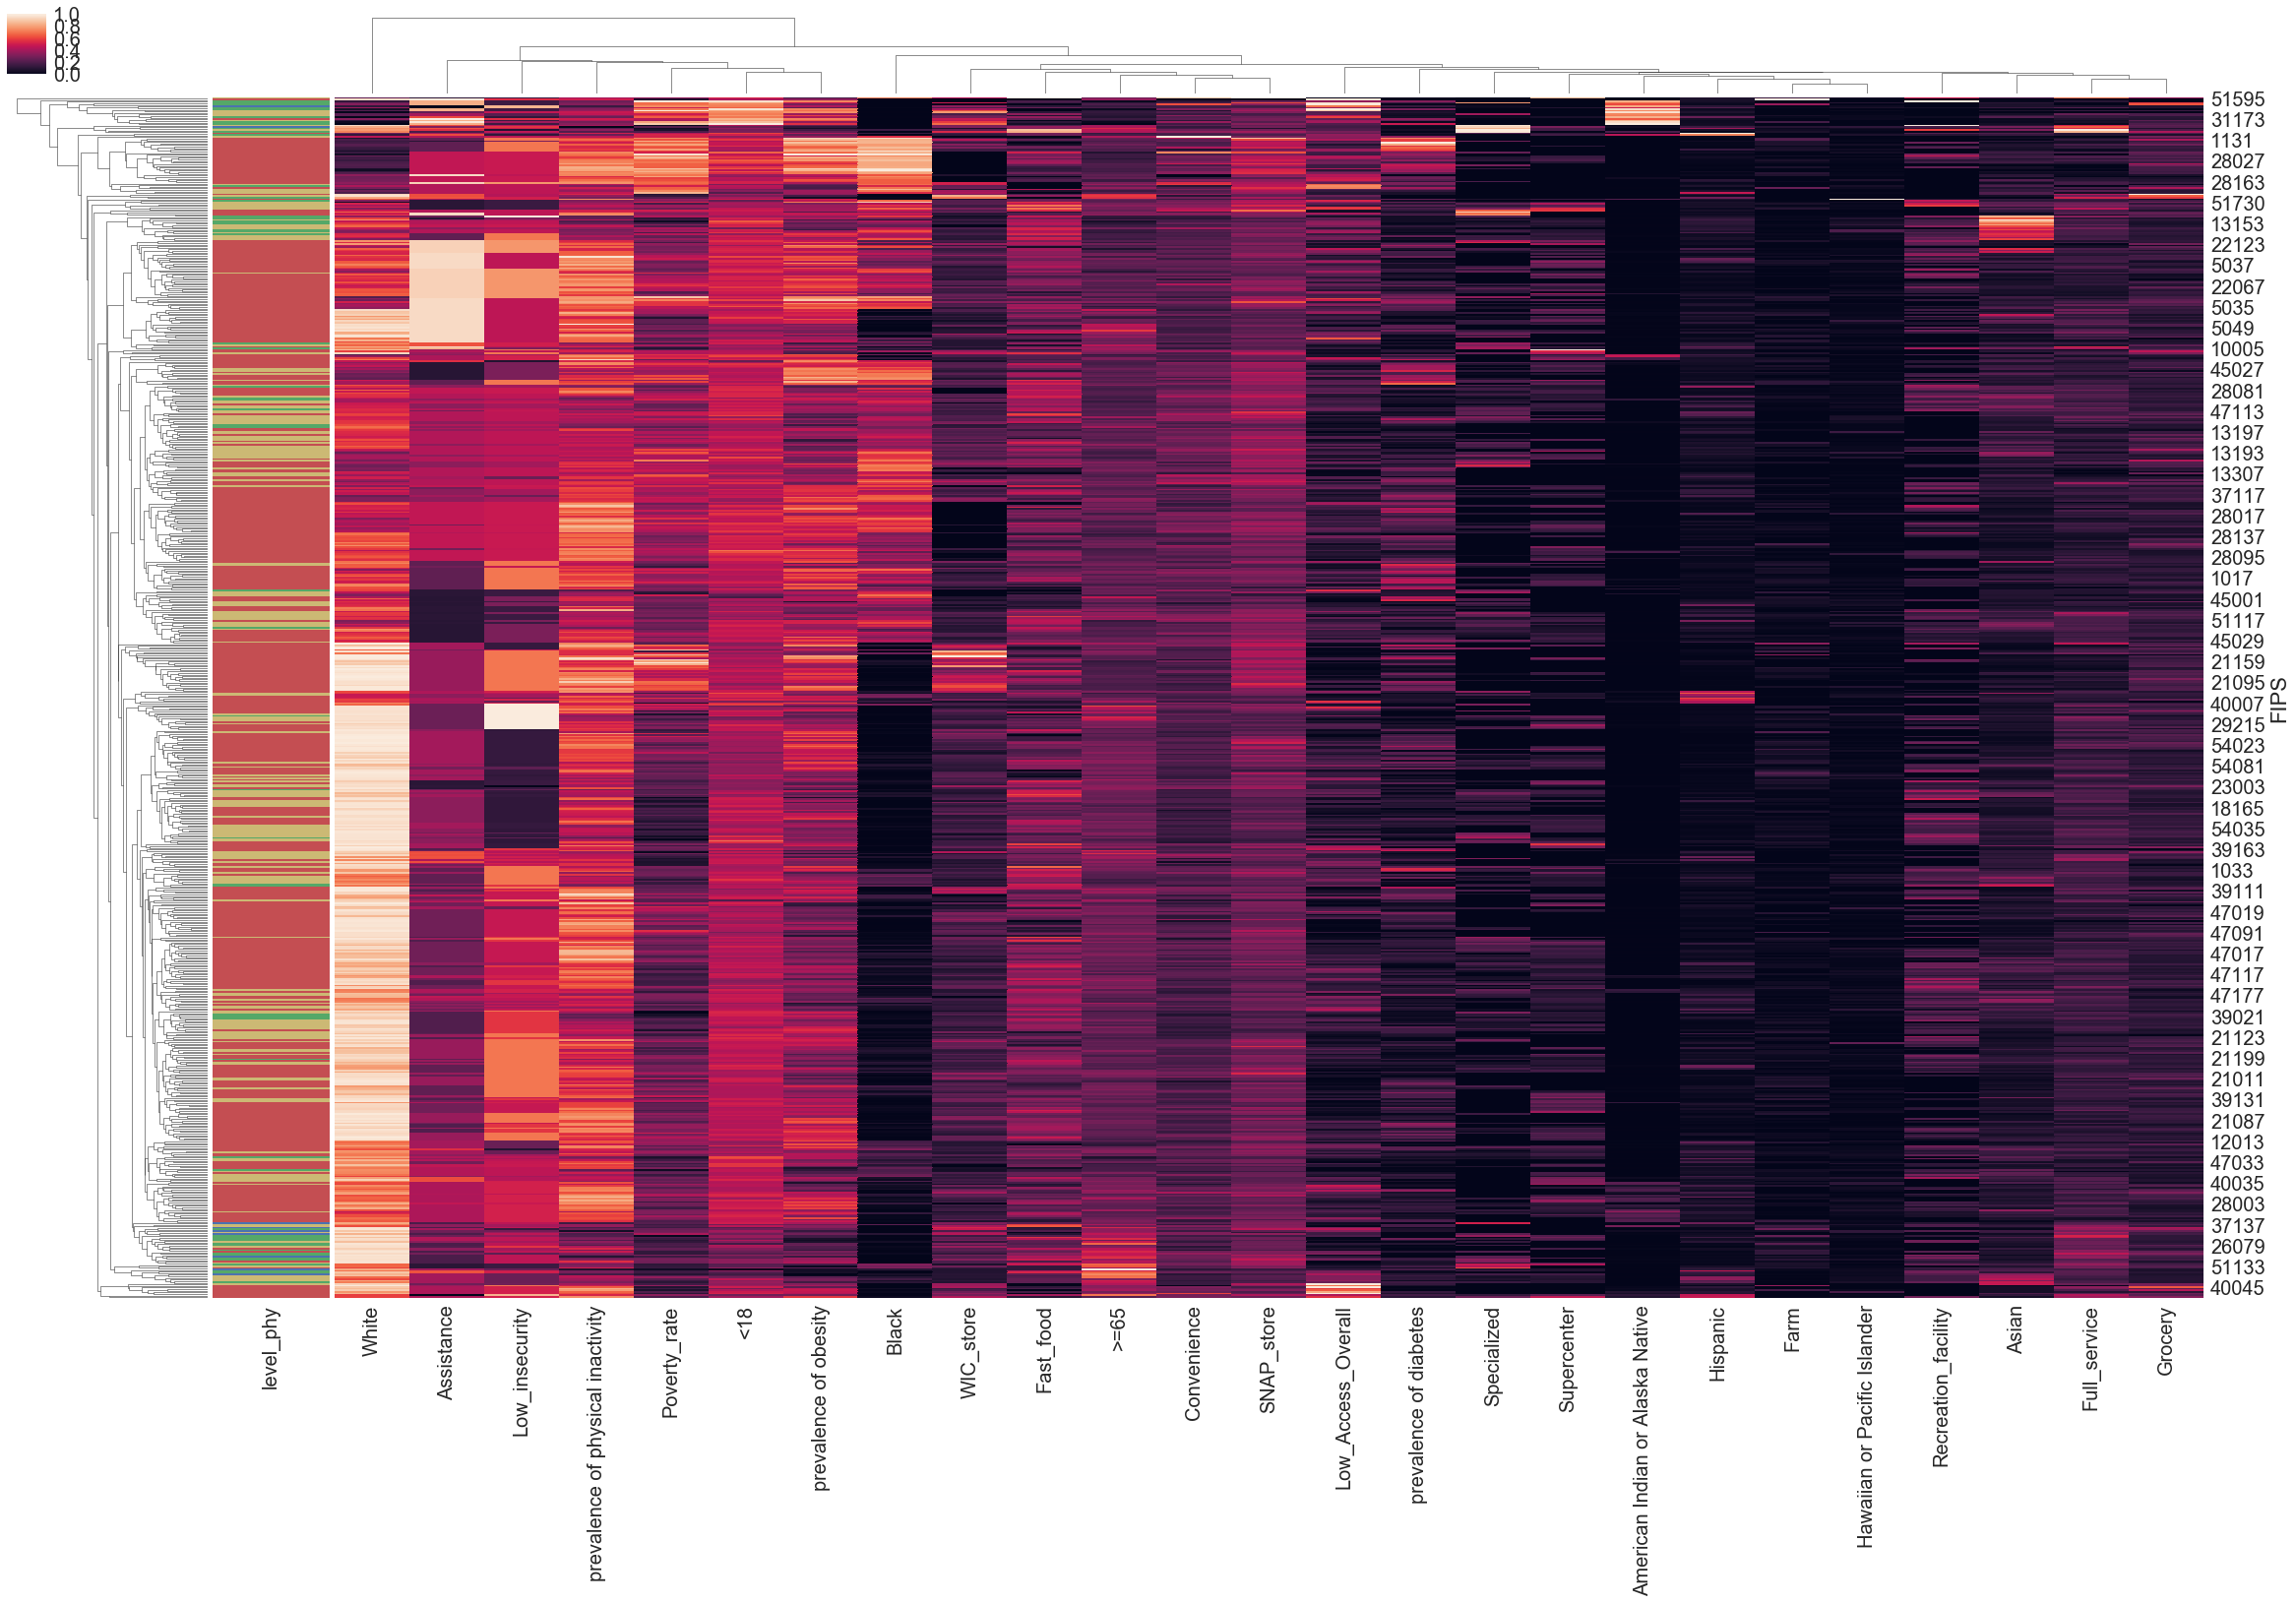

In [309]:
df_subset=normed_df[normed_df['level_diabetes']==3]


sns.set(font_scale=2)

grouptag='level_phy'

row_colors = normed_df[grouptag].map(lut)
g = sns.clustermap(df_subset[df_subset.columns.difference(['level_diabetes','level_obesity','level_phy'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1,annot_kws={"size": 16})
#plt.xticks(fontsize=18, rotation=60)
plt.show()

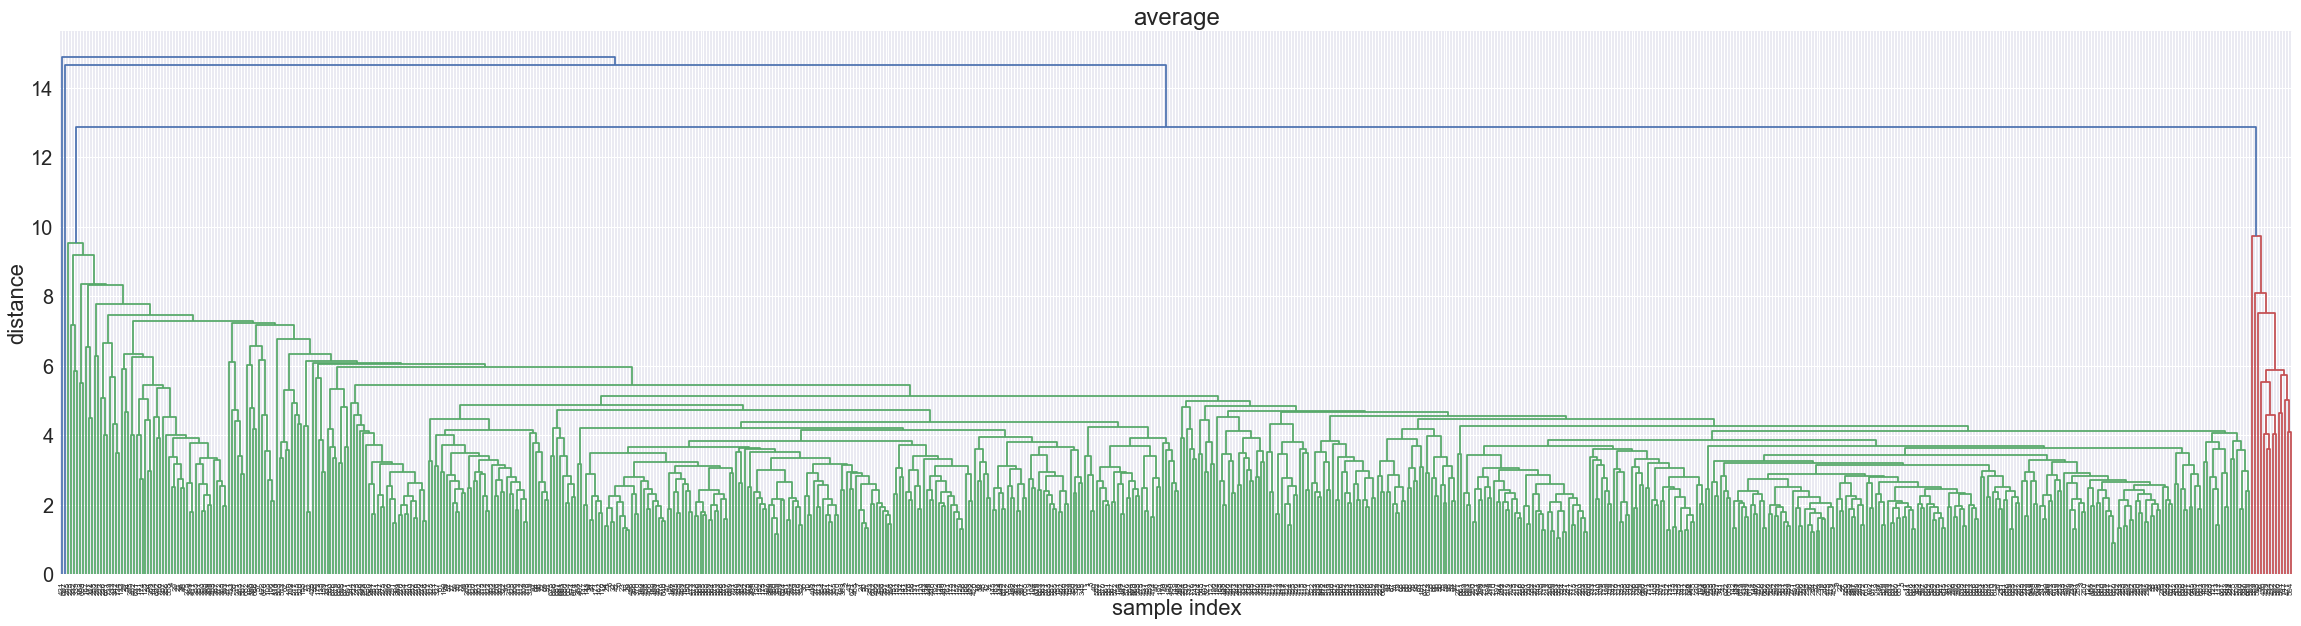

In [322]:
X=df_subset[df_subset.columns.difference(['prevalence of diabetes', 'level_diabetes','level_obesity','level_phy'])]
Z = linkage(X, 'average')
plt.figure(figsize=(40, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('average')
plt.show()



In [332]:
from scipy.cluster.hierarchy import cut_tree, fcluster

cutree = cut_tree(Z, n_clusters=3)


In [343]:
assignments = fcluster(Z,8,'distance')
set(assignments)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [344]:
df_subset['group']=assignments

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


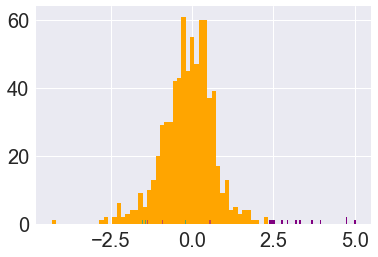

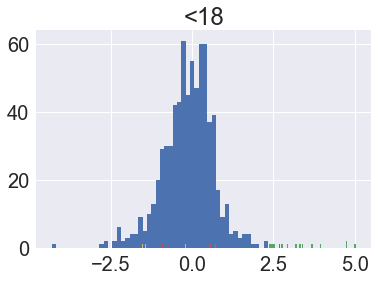

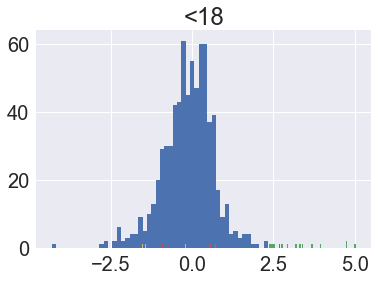

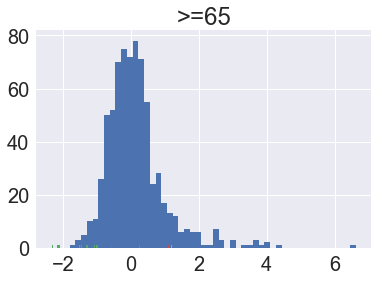

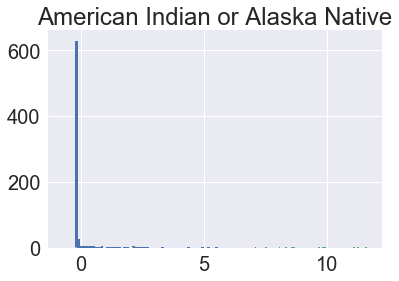

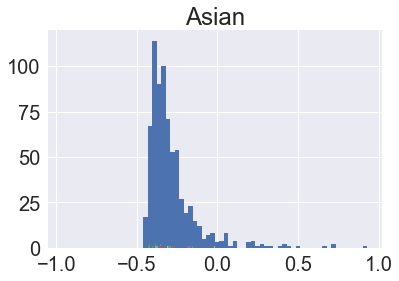

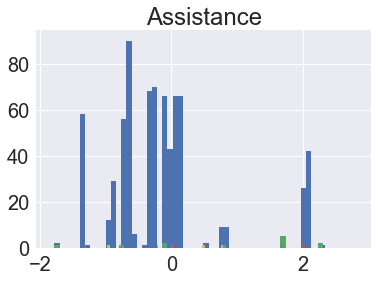

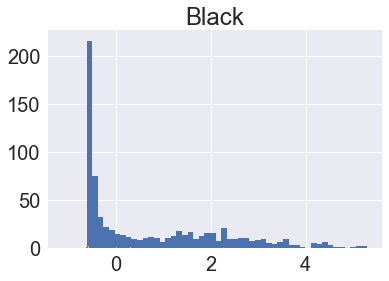

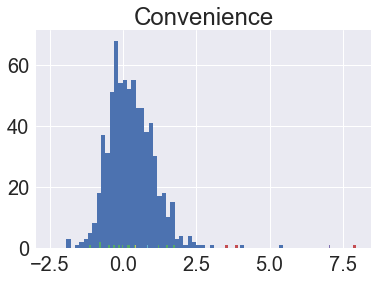

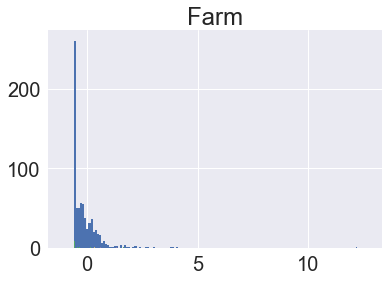

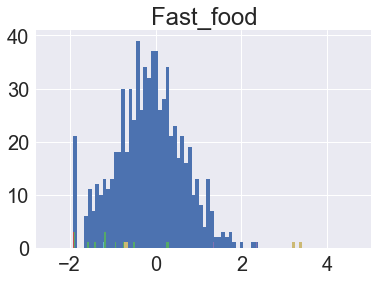

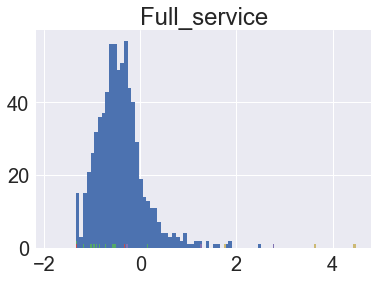

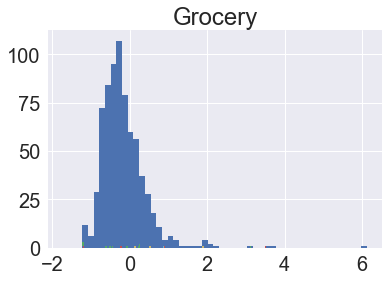

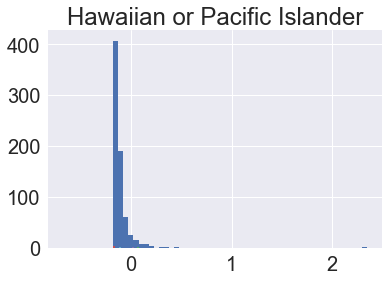

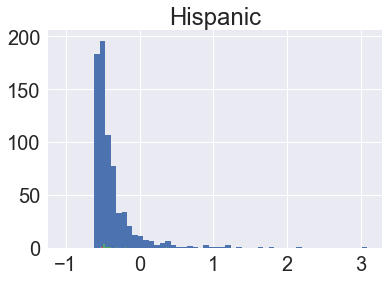

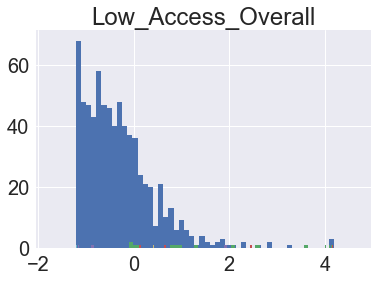

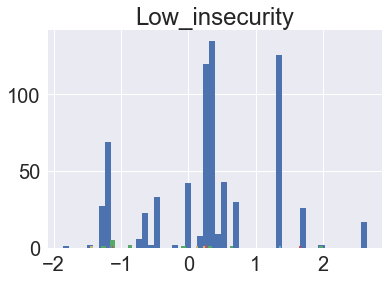

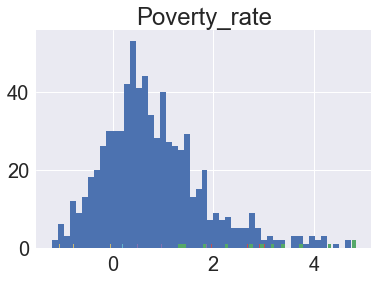

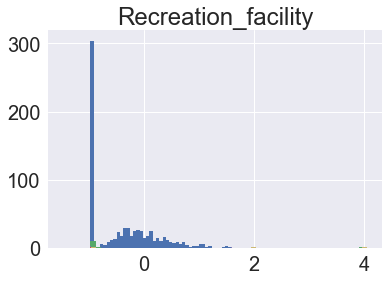

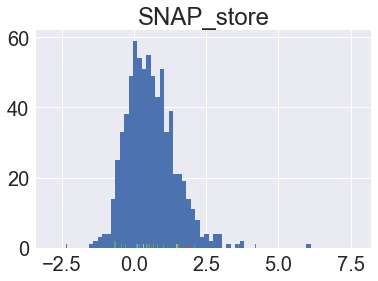

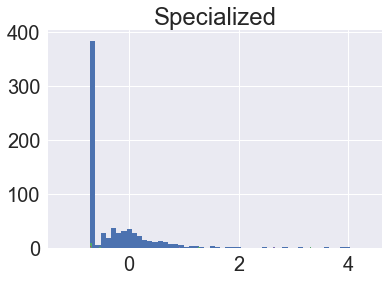

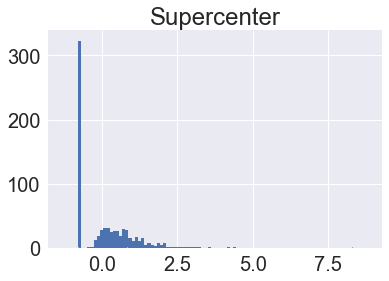

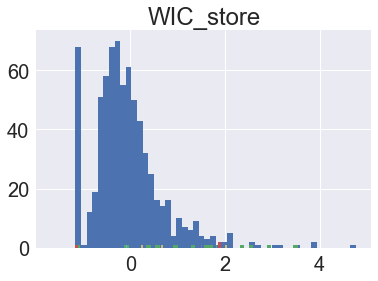

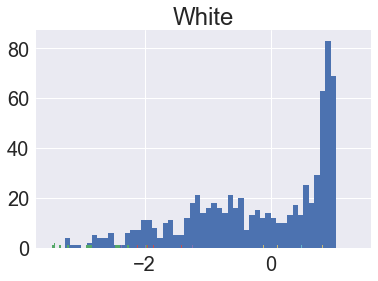

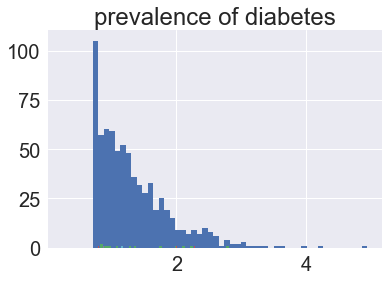

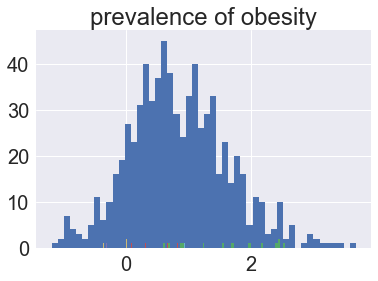

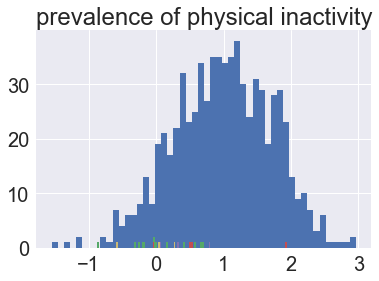

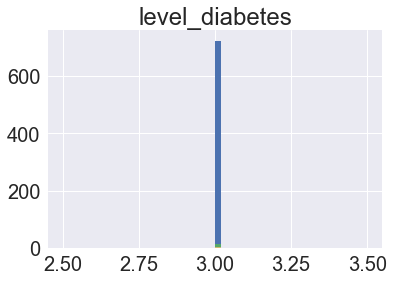

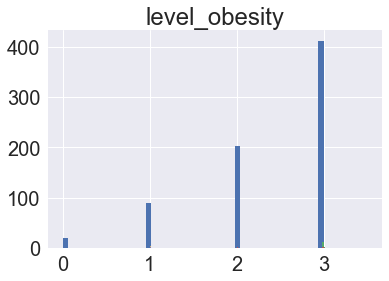

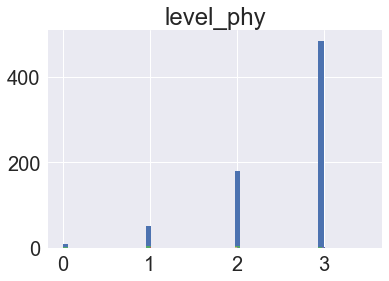

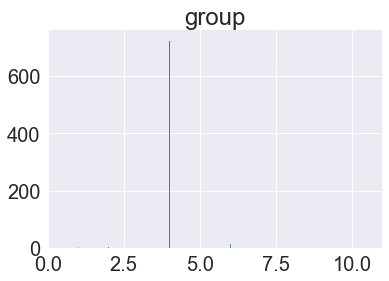

In [347]:
#colors=['b','g','y','r', 'orange','m', 'purple']
for c in df_subset.columns:
    plt.figure()
    for n in df_subset['group'].unique():
        df_subset[df_subset['group']==n][c].hist(bins=50)
    plt.title(c)
    plt.legend()
    plt.show()

In [ ]:
df_0=normed_df[normed_df['level of diabetes']==3]
g = sns.clustermap(df_0[df_0.columns.difference(['level of diabetes'])], 
                   row_colors=row_colors, figsize=(40,24), standard_scale=1)
plt.show()

C:\anaconda\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


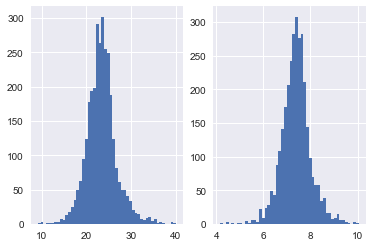

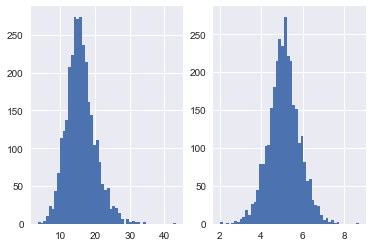

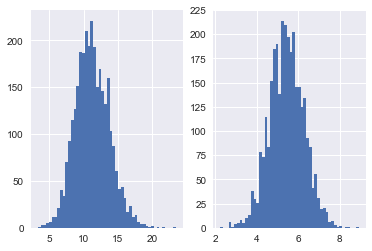

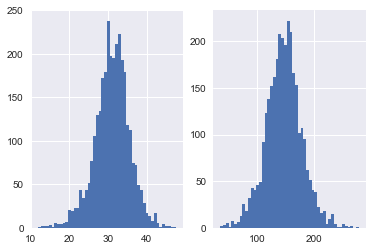

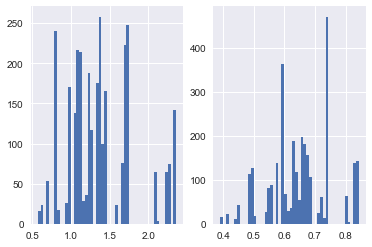

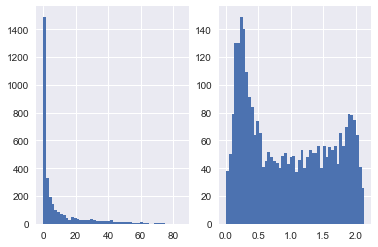

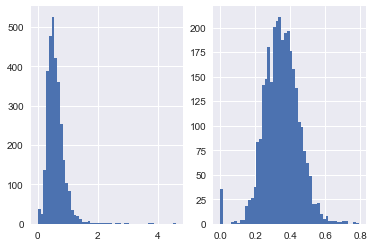

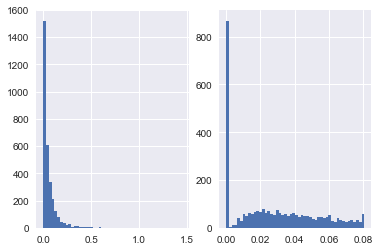

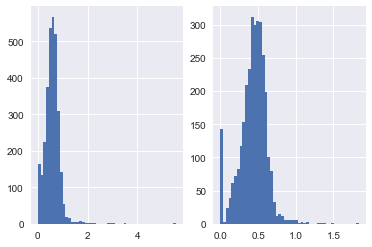

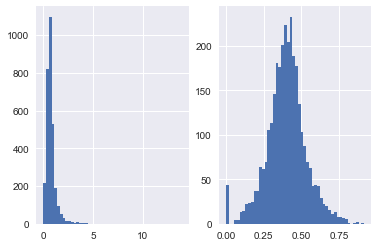

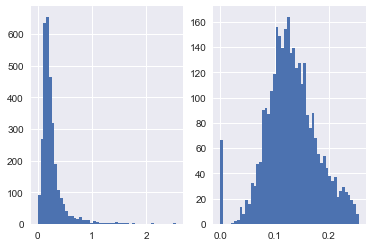

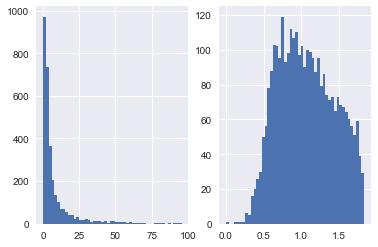

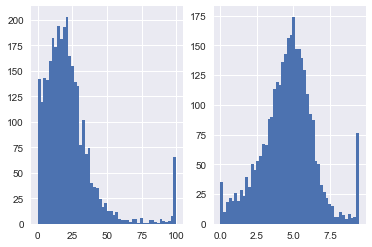

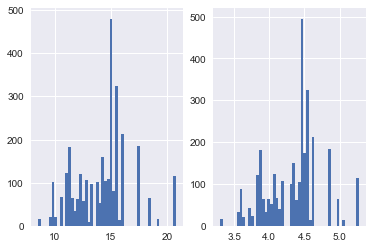

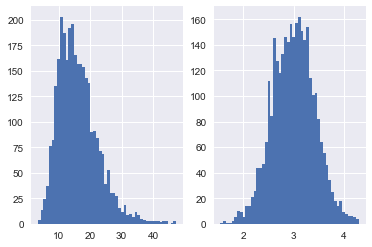

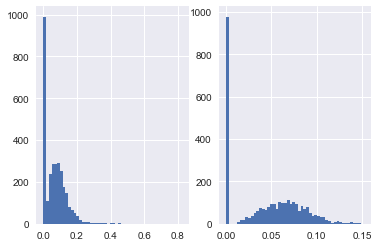

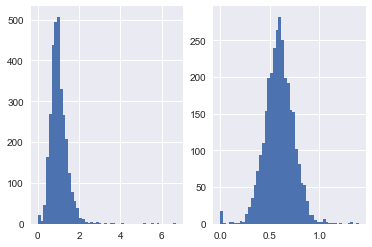

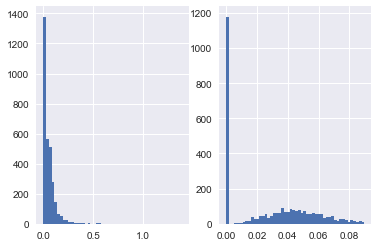

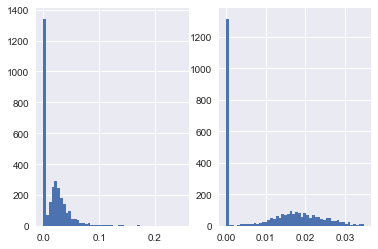

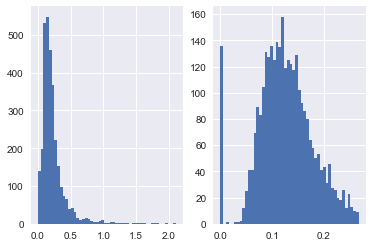

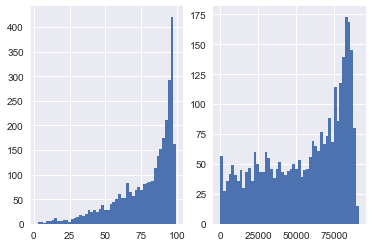

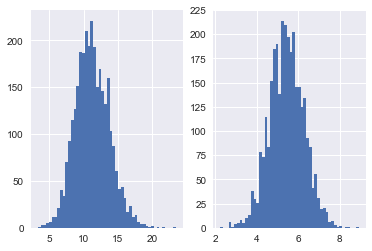

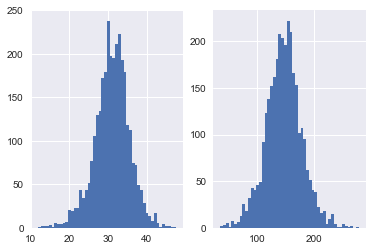

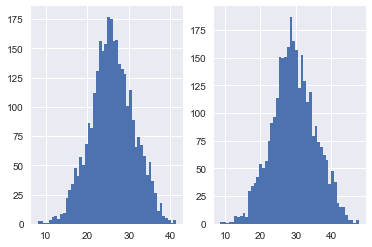

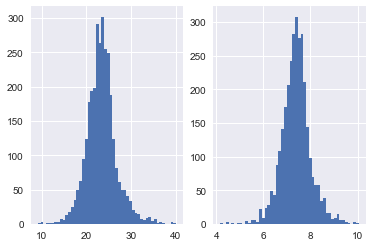

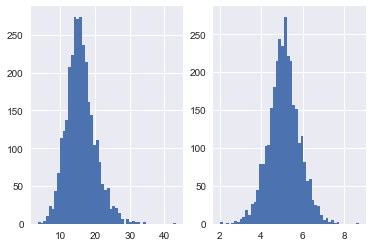

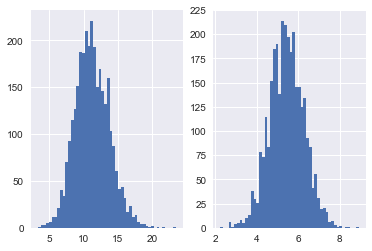

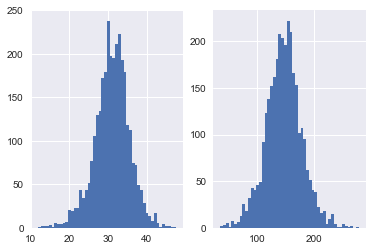

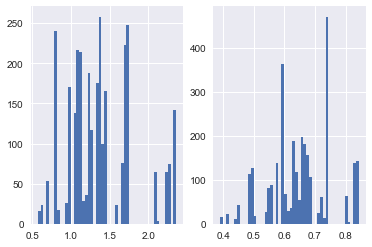

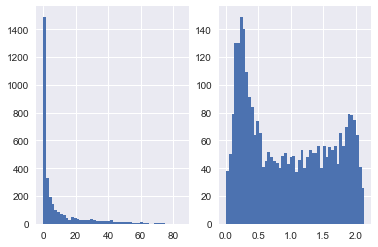

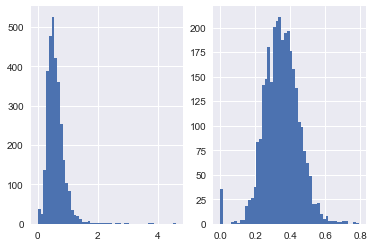

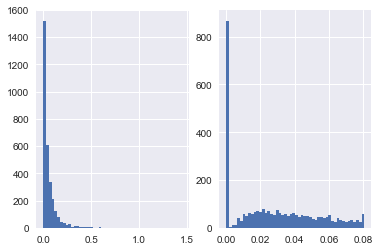

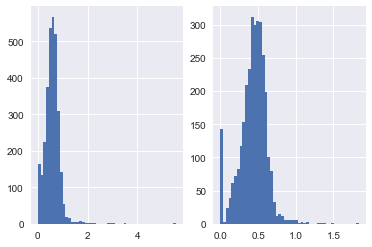

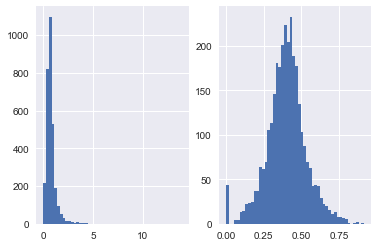

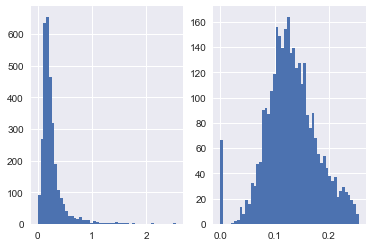

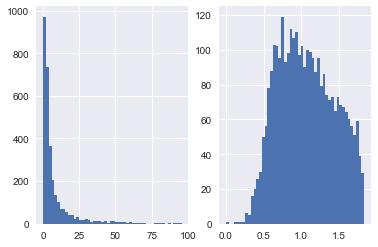

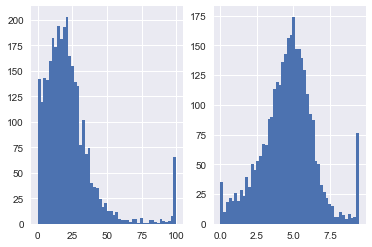

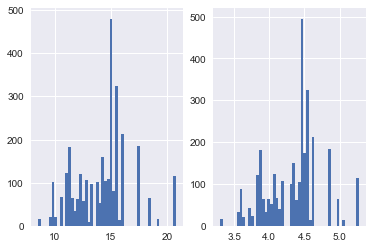

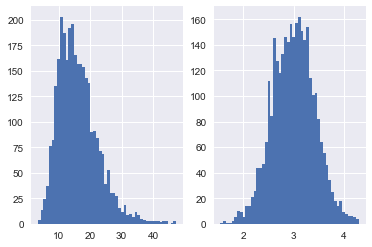

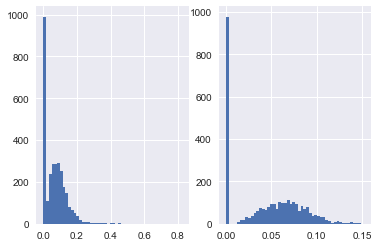

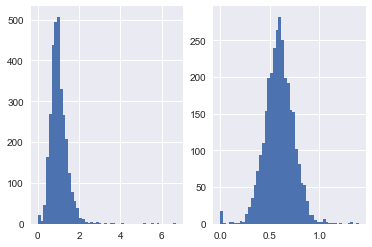

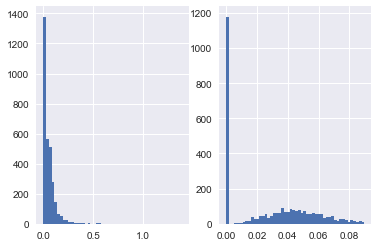

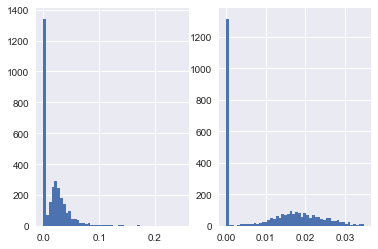

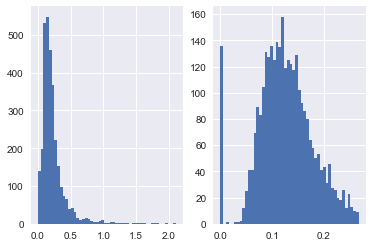

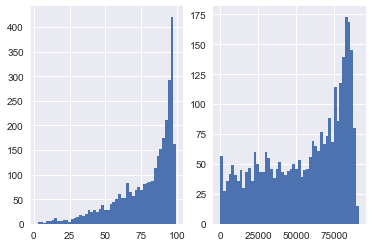

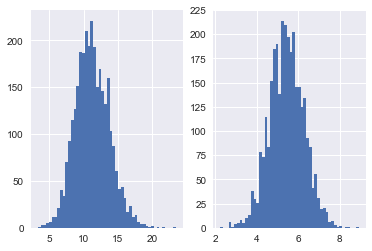

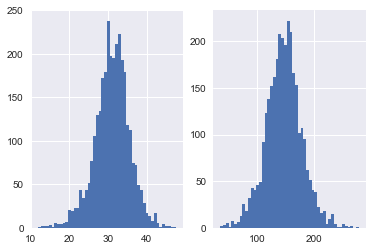

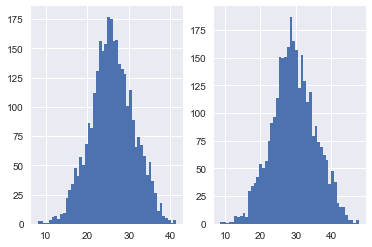

In [93]:
for c in df_for_scale.columns:
    plt.figure()
    plt.title(c)
    plt.subplot(1,2,1)
    df_for_scale[c].hist(bins=50)
    plt.subplot(1,2,2)
    df_transformed[c].hist(bins=50)
plt.show()

K means clustering

In [284]:
#PCA analysis using the standardized data
## compute the covariance matrix
corr=normed_df[normed_df.columns.difference(['Low_insecurity','level_diabetes','level_obesity','level_phy'])].corr()

In [285]:
evals, evecs = np.linalg.eigh(corr)

In [286]:
df_eigh=pd.DataFrame()
df_eigh['evalue']=evals
for i in range(len(evals)):
    df_eigh['evec_'+str(i+1)]=evecs[i,:]
df_eigh.index=corr.index

In [287]:
df_eigh=df_eigh.sort_values(by='evalue', ascending=False)
df_eigh['exp_var']=df_eigh['evalue']/df_eigh['evalue'].sum()
df_eigh['cum_exp_var']=np.cumsum(df_eigh['exp_var'])

In [288]:
df_eigh['cum_exp_var']

prevalence of physical inactivity    0.179744
prevalence of obesity                0.317538
prevalence of diabetes               0.415354
White                                0.491658
WIC_store                            0.547693
Supercenter                          0.598407
Specialized                          0.642429
SNAP_store                           0.683693
Recreation_facility                  0.720718
Poverty_rate                         0.754202
Low_Access_Overall                   0.787003
Hispanic                             0.818444
Hawaiian or Pacific Islander         0.846266
Grocery                              0.872699
Full_service                         0.896724
Fast_food                            0.916088
Farm                                 0.932963
Convenience                          0.948691
Black                                0.962152
Assistance                           0.974094
Asian                                0.984936
American Indian or Alaska Native  

explained variance exceeds 95% at variable 'Convenience', where we keep that variables from top until 'Convenience', so the dimentions decrease from 24 to 19

In [289]:
#PCA using Sklearn 
from sklearn.decomposition import PCA

explained_var=list()
for d in range(1,len(normed_df.columns)):
    pca = PCA(n_components=d)
    pca.fit(normed_df)
    explained_var.append(sum(pca.explained_variance_ratio_))

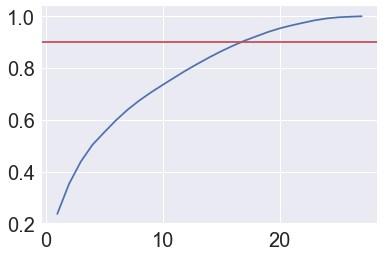

In [290]:
plt.plot(range(1,len(normed_df.columns)), explained_var)
plt.axhline(y=0.9, color='r')
plt.show()

In [268]:
#90% of variance can be explained by 16 components out of total 24 variables
pca = PCA(n_components=16)
pca.fit(normed_df)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [269]:
data_transformed=pca.transform(normed_df)
df_transformed=pd.DataFrame(data_transformed, index=normed_df.index)

segmentation based on diabetes and obesity prevalence

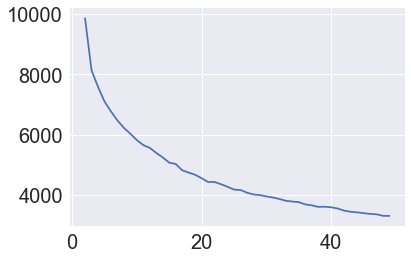

In [270]:
from sklearn.cluster import KMeans

normed_df['level_diabetes']=pd.qcut(normed_df['prevalence of diabetes'], [0, .25, .5, .75, 1.], labels=False)
normed_df['level_obesity']=pd.qcut(normed_df['prevalence of obesity'], [0, .25, .5, .75, 1.], labels=False)
normed_df['level_phy']=pd.qcut(normed_df['prevalence of physical inactivity'], [0, .25, .5, .75, 1.], labels=False)

df_transformed=pd.concat([df_transformed, normed_df.loc[:, ['level_diabetes','level_obesity','level_phy']]], axis=1)
df_subset=df_transformed[df_transformed['level_diabetes']==3]

K=50
dists=list()
for i in range(2,K):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_subset[df_subset.columns.difference(['level_diabetes','level_obesity','level_phy'])])
    dists.append(kmeans.inertia_)

plt.plot(range(2,K), dists)
plt.show()


#plt.show()  

#scaled_df['group']=kmeans.labels_
#df_for_scale['group']=kmeans.labels_

In [303]:
from sklearn.cluster import KMeans

dists=list()
for n in range(100):
    kmeans = KMeans(n_clusters=4, random_state=40).fit(df_subset[df_subset.columns.difference(['level_diabetes','level_obesity','level_phy'])])
    dists.append(kmeans.inertia_)

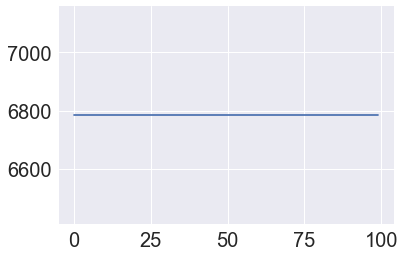

In [274]:
plt.plot(range(100), dists)
plt.show()

In [307]:
df_subset=df_for_scale[df_transformed['level_diabetes']==3]
df_subset['group']=kmeans.labels_

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [348]:
colors=['b','g','y','r', 'm', 'purple']
for c in df_subset.columns:
    plt.figure()
    for n in df_subset['group'].unique():
        df_subset[df_subset['group']==n][c].hist(bins=50, color=colors[n], normed=True)
    plt.title(c)
    plt.show()
   

IndexError: list index out of range

In [ ]:
#among counties with highest level of 